In [1]:
import requests as rq
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from collections import 
from PIL import Image
from PIL import ImageFilter
from PIL import ImageDraw


from bokeh.plotting import figure, ColumnDataSource, output_file, show
from bokeh.io import output_notebook, show
from bokeh.models import HoverTool
from sklearn.preprocessing import StandardScaler
import json
import os
import glob
import datetime as dt
from MulticoreTSNE import MulticoreTSNE as TSNE
now = dt.datetime.now
output_notebook()

Loading BokehJS ...

In [2]:
def get_list(p = 'charts_mid'):
    for path in glob.iglob(p+'/**/**'):
        s = os.path.basename(path).replace('.png','').upper()
        if os.stat(path).st_size < 900 or ('+' in s) or ('^' in s) or ('=' in s) or ('-' in s) or ('_' in s) or ('$' in s):
            continue
        yield (s, path)

In [4]:
def get_symbols_list():
    if os.path.exists('symbols.json'):
        with open('symbols.json',mode='r') as f:
            return json.load(f)
    try:
        data = rq.get('https://api.iextrading.com/1.0/ref-data/symbols').json()
        with open('symbols.json',mode='w') as f:
            json.dump(data, f)
        return data
    except Exception as ex:
        print(ex)
        pass

stock_type = {}
for s in get_symbols_list():
    if s['type'] == 'et' or s['type'] == 'ce':
        continue
    stock_type[s['symbol']] = s['type']

In [5]:
charts = list(get_list())

In [6]:
len(charts)

7379

In [7]:
cc = [c[0] for c in charts]
Counter(''.join(cc))

NameError: name 'Counter' is not defined

(7379, 9522)
CPU times: user 46 µs, sys: 173 µs, total: 219 µs
Wall time: 226 µs
2018-09-30 03:11:09.285680 create scalar
CPU times: user 2.17 s, sys: 804 ms, total: 2.98 s
Wall time: 1.9 s
2018-09-30 03:11:11.185521 created scalar
CPU times: user 667 ms, sys: 450 ms, total: 1.12 s
Wall time: 1.1 s
2018-09-30 03:11:12.289994 transformed


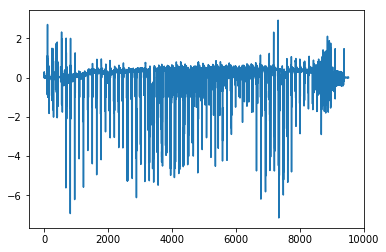

In [78]:
a = np.array([np.array(Image.open(path[1]).getdata())/255 for path in charts])
print(a.shape)
%time scalar = StandardScaler()
print(now(), 'create scalar')
%time scalar.fit(a)
print(now(), 'created scalar')
%time norm = scalar.transform(a)
print(now(), 'transformed')
plt.plot(norm[1])
np.save('charts_small_'+str(len(a)), a)

In [79]:
# pdrate[['over 1%', 'over 2%', 'over 3%','over 4%','over 5%','rate001', 'rate002', 'rate003','rate004','rate005',"year5CP", "year2CP", "year1CP", "ytdCP", "month6CP", "month3CP", "month1CP", "day5CP", "day30CP"]]
tsne = TSNE(perplexity=100, n_jobs=16,verbose=10)
%time y = tsne.fit_transform(a)

CPU times: user 9min 20s, sys: 1.85 s, total: 9min 22s
Wall time: 9min 22s


In [80]:
y.shape

(7379, 2)

In [63]:
from collections import Counter 

In [64]:
c = Counter([c[0] for c in charts])
[cc[0] for cc in c.items() if c[1] >1]

[]

In [87]:
df = pd.read_csv('research.csv')
df.set_index('symbol', inplace=True)

In [109]:
rate = np.array([df.loc[c[0]]['rate001'] for c in charts])

In [131]:
from bokeh.palettes import d3

In [134]:
ratec = Counter(rate)

In [141]:
color = ['red' if r else 'green' for r in rate>0.7]
import bokeh.models as bmo
palette = d3['Category10'][10]
color_map = bmo.CategoricalColorMapper(factors=list(ratec.keys()),
                                   palette=palette)

ValueError: expected an element of either Seq(String), Seq(Tuple(String, String)) or Seq(Tuple(String, String, String)), got [0.526984126984127, 0.6809523809523811, 0.06186726659167604, 0.6952380952380952, 0.04366812227074236, 0.3563492063492064, 0.2658730158730159, 0.6857142857142857, 0.3603174603174603, 0.0106951871657754, 0.5801587301587302, 0.01606425702811245, 0.5777777777777777, 0.5793650793650794, 0.6158730158730159, 0.17777777777777778, 0.0880952380952381, 0.02313624678663239, 0.7444444444444445, 0.3466981132075472, 0.6928571428571428, 0.011326860841423949, 0.2992063492063492, 0.4944444444444445, 0.14012738853503184, 0.6587301587301587, 0.1380952380952381, 0.6981731532962668, 0.5445151033386327, 0.6708860759493671, 0.5234312946783162, 0.6548984995586937, 0.7701612903225806, 0.711340206185567, 0.7707509881422925, 0.7938931297709924, 0.05434782608695652, 0.7539682539682541, 0.09761904761904762, 0.3626984126984127, 0.5722222222222222, 0.5314240254574384, 0.6063492063492063, 0.4568627450980392, 0.06043437204910292, 0.6340110905730129, 0.6776556776556777, 0.012244897959183671, 0.01596169193934557, 0.676984126984127, 0.8269230769230769, 0.2825396825396825, 0.25952380952380955, 0.5277777777777778, 0.02146690518783542, 0.3317460317460317, 0.6501623376623377, 0.4960317460317461, 0.1984126984126984, 0.13333333333333333, 0.14761904761904762, 0.492063492063492, 0.4595238095238095, 0.5753968253968254, 0.5738095238095238, 0.5166666666666667, 0.15760869565217392, 0.41984126984126985, 0.26954732510288065, 0.38222222222222224, 0.03888888888888889, 0.08333333333333333, 0.030965391621129323, 0.34985700667302194, 0.7014563106796117, 0.6039682539682539, 0.2920634920634921, 0.8095238095238095, 0.018691588785046728, 0.5492063492063493, 0.5331753554502371, 0.5915492957746479, 0.2563492063492063, 0.022222222222222227, 0.5587301587301587, 0.2896825396825397, 0.06825396825396825, 0.7007936507936507, 0.2761904761904762, 0.6666666666666666, 0.17698412698412697, 0.3126984126984127, 0.11666666666666667, 0.5, 0.2246031746031746, 0.008547008547008548, 0.42936507936507934, 0.528196981731533, 0.4611111111111112, 0.00598802395209581, 0.12063492063492065, 0.3162393162393162, 0.5472972972972973, 0.6929133858267716, 0.6301587301587301, 0.32118758434547906, 0.4547619047619048, 0.4857142857142857, 0.5746031746031746, 0.10289389067524116, 0.04376012965964344, 0.6714285714285714, 0.1357142857142857, 0.10396825396825396, 0.5976190476190476, 0.05676855895196506, 0.6484126984126984, 0.0038910505836575885, 0.6341269841269841, 0.2, 0.6824324324324325, 0.02782324058919804, 0.08267090620031796, 0.32142857142857145, 0.35396825396825393, 0.0, 0.4011119936457506, 0.5738636363636364, 0.17316017316017315, 0.11825396825396825, 0.5135356849876949, 0.37301587301587297, 0.5865079365079365, 0.012048192771084338, 0.557936507936508, 0.6251012145748988, 0.7496855345911949, 0.5031796502384738, 0.05882352941176471, 0.22777777777777775, 0.5624502784407319, 0.15634920634920635, 0.043701799485861184, 0.7826086956521741, 0.0247320692497939, 0.2253968253968254, 0.051779935275080916, 0.03272727272727273, 0.4249404289118348, 0.1492063492063492, 0.4634920634920635, 0.009771986970684038, 0.4142857142857143, 0.4357142857142857, 0.18492063492063493, 0.8178137651821862, 0.4373401534526854, 0.19444444444444445, 0.3055555555555556, 0.041894353369763215, 0.71733561058924, 0.6134920634920635, 0.0270042194092827, 0.0784313725490196, 0.046825396825396826, 0.1, 0.4184615384615384, 0.14457831325301204, 0.7817258883248731, 0.6753968253968254, 0.4698412698412698, 0.06890894175553733, 0.1738095238095238, 0.37777777777777777, 0.5436507936507936, 0.3936507936507936, 0.0992063492063492, 0.2404761904761905, 0.5015873015873016, 0.7694753577106518, 0.2507936507936508, 0.5214285714285715, 0.4571428571428571, 0.1388888888888889, 0.10978520286396183, 0.7103174603174603, 0.7793650793650794, 0.6507936507936508, 0.3595238095238095, 0.656025538707103, 0.6865079365079365, 0.38394276629570745, 0.11587301587301588, 0.5769841269841269, 0.5854632587859425, 0.3761904761904762, 0.3753968253968254, 0.4544650751547304, 0.5666666666666667, 0.7423371647509579, 0.2650793650793651, 0.6051537822111388, 0.7477124183006536, 0.65, 0.78, 0.6823529411764706, 0.5931528662420382, 0.1261904761904762, 0.2651273885350319, 0.014787430683918669, 0.3888888888888889, 0.7404761904761905, 0.2343883661248931, 0.823076923076923, 0.08975377283558379, 0.553968253968254, 0.2037643207855974, 0.7336769759450171, 0.5761904761904761, 0.6682539682539682, 0.6531746031746032, 0.7434210526315791, 0.07222222222222223, 0.07705479452054795, 0.22158273381294966, 0.0471441523118767, 0.7410358565737052, 0.6056224899598394, 0.3658730158730159, 0.2904761904761905, 0.0196078431372549, 0.123015873015873, 0.3547619047619048, 0.025830258302583026, 0.6198412698412699, 0.32063492063492066, 0.6285714285714286, 0.7474137931034482, 0.4349206349206349, 0.7050528789659224, 0.5293650793650794, 0.6626889419252188, 0.5261904761904762, 0.6967821782178217, 0.7582978723404256, 0.2150793650793651, 0.16666666666666666, 0.7591911764705882, 0.6269841269841271, 0.6126984126984127, 0.37857142857142856, 0.6656076250992852, 0.7412698412698413, 0.3388888888888889, 0.6947826086956522, 0.3148148148148148, 0.020942408376963352, 0.12936507936507938, 0.5388007054673721, 0.3007936507936508, 0.6111111111111112, 0.4132841328413284, 0.07647058823529412, 0.3922697368421053, 0.3548728813559322, 0.7158730158730159, 0.42777777777777776, 0.6841269841269841, 0.2163187855787476, 0.84375, 0.4793650793650794, 0.040515653775322284, 0.4951690821256038, 0.5648, 0.412327311370882, 0.6816901408450704, 0.5619047619047619, 0.37698412698412703, 0.7121212121212122, 0.17142857142857146, 0.5103174603174603, 0.3956386292834891, 0.3261904761904762, 0.3234200743494424, 0.4619047619047619, 0.423015873015873, 0.1048951048951049, 0.006349206349206349, 0.35714285714285715, 0.4894671623296159, 0.10756302521008404, 0.7019230769230769, 0.4150793650793651, 0.2296416938110749, 0.43312101910828027, 0.5888888888888889, 0.5047619047619047, 0.6174603174603175, 0.4444444444444444, 0.4778046811945117, 0.6047619047619047, 0.5373015873015873, 0.6113886113886113, 0.4626984126984127, 0.1493288590604027, 0.22503725782414308, 0.7190476190476189, 0.13447653429602888, 0.0539906103286385, 0.7262872628726287, 0.2412698412698413, 0.7944444444444444, 0.4222222222222222, 0.0246422893481717, 0.6888888888888889, 0.08952837729816147, 0.056521739130434775, 0.4865079365079365, 0.00873015873015873, 0.4268060836501901, 0.4166666666666667, 0.5908045977011495, 0.44019138755980863, 0.017441860465116282, 0.0065146579804560255, 0.4674603174603175, 0.3523809523809524, 0.43253968253968256, 0.5301587301587302, 0.38412698412698415, 0.6624305003971406, 0.7071428571428572, 0.6630303030303031, 0.6071428571428571, 0.7809523809523811, 0.006628003314001657, 0.5317460317460317, 0.1865079365079365, 0.5468253968253968, 0.24444444444444444, 0.5831622176591376, 0.02386634844868735, 0.5555555555555556, 0.5246031746031746, 0.6007936507936508, 0.4010152284263959, 0.4095701540957015, 0.021834061135371174, 0.6106870229007634, 0.3968253968253968, 0.6823248407643312, 0.7357142857142858, 0.5658730158730159, 0.6266666666666667, 0.4365079365079365, 0.5682539682539682, 0.23801220575414125, 0.480952380952381, 0.3150793650793651, 0.3073868149324861, 0.31213872832369943, 0.4753968253968254, 0.6706349206349206, 0.649164677804296, 0.1968253968253968, 0.04047619047619048, 0.7048458149779736, 0.6626984126984127, 0.255758538522637, 0.5517241379310345, 0.05803571428571429, 0.04329004329004329, 0.6865203761755486, 0.3912698412698413, 0.049206349206349205, 0.11428571428571427, 0.36386138613861385, 0.4063492063492064, 0.0045045045045045045, 0.6571428571428571, 0.5222222222222223, 0.5920634920634921, 0.7031746031746032, 0.09603174603174604, 0.43095238095238103, 0.6476190476190476, 0.6428571428571429, 0.3333333333333333, 0.2020618556701031, 0.4725363489499193, 0.3690476190476191, 0.4246031746031746, 0.44241461477362987, 0.42698412698412697, 0.3111679454390452, 0.581447963800905, 0.2185602775368604, 0.3038194444444444, 0.2023486901535682, 0.04291845493562232, 0.0847723704866562, 0.00949367088607595, 0.010447761194029851, 0.5611111111111111, 0.0729455216989843, 0.08258928571428571, 0.3744207599629286, 0.7742448330683624, 0.43174603174603177, 0.18587746625129806, 0.19285714285714287, 0.026984126984126985, 0.7116759332803813, 0.2788365095285857, 0.8119047619047619, 0.6674603174603174, 0.7253968253968254, 0.6140209508460919, 0.18976169461606354, 0.4229471316085489, 0.0045662100456621, 0.4614035087719298, 0.6277777777777778, 0.0917135961383749, 0.2849206349206349, 0.09595959595959597, 0.756155679110405, 0.2785714285714286, 0.6357142857142857, 0.06666666666666668, 0.6119047619047621, 0.08015873015873018, 0.1746031746031746, 0.22936507936507936, 0.7066772655007949, 0.7349206349206351, 0.6873015873015873, 0.5841269841269842, 0.0009861932938856016, 0.09090909090909093, 0.7984126984126985, 0.08968253968253967, 0.00544069640914037, 0.4682539682539682, 0.03787878787878788, 0.4781572676727562, 0.257936507936508, 0.7328519855595668, 0.4896825396825397, 0.026512013256006627, 0.04, 0.1240934730056406, 0.0507936507936508, 0.1365079365079365, 0.06349206349206349, 0.06507936507936507, 0.6467213114754098, 0.010380622837370242, 0.1246031746031746, 0.023070803500397773, 0.01984126984126984, 0.024630541871921183, 0.6334763948497855, 0.4563492063492064, 0.00842358604091456, 0.08492063492063492, 0.017699115044247787, 0.057142857142857134, 0.04394426580921758, 0.07698412698412699, 0.03492063492063492, 0.6238095238095238, 0.6518578352180937, 0.15201900237529692, 0.011182108626198084, 0.6196721311475409, 0.5285714285714286, 0.1595238095238095, 0.3942394239423943, 0.15246212121212122, 0.6777777777777778, 0.2531746031746032, 0.3928571428571429, 0.009456264775413713, 0.6984126984126984, 0.3442340791738382, 0.6719618745035743, 0.015151515151515154, 0.3555555555555556, 0.06984126984126984, 0.028985507246376805, 0.32019704433497537, 0.3834329632792485, 0.0111731843575419, 0.4777777777777778, 0.3920634920634921, 0.05793650793650794, 0.18253968253968253, 0.01973684210526316, 0.2634920634920635, 0.16111111111111112, 0.2492063492063492, 0.7182539682539683, 0.14206349206349206, 0.21904761904761905, 0.4, 0.2888888888888889, 0.16587301587301587, 0.24365079365079365, 0.04292527821939587, 0.14365079365079364, 0.19126984126984128, 0.6206349206349207, 0.696031746031746, 0.5652173913043478, 0.027096774193548383, 0.6316939890710382, 0.023015873015873014, 0.04523809523809524, 0.007575757575757577, 0.6854646544876887, 0.3804347826086957, 0.0778688524590164, 0.04172876304023845, 0.6703910614525139, 0.012698412698412698, 0.41825396825396827, 0.05952380952380953, 0.23095238095238094, 0.07777777777777778, 0.08412698412698412, 0.4428571428571429, 0.2333333333333333, 0.6, 0.6136724960254372, 0.5071428571428571, 0.15555555555555556, 0.7, 0.4873015873015873, 0.053174603174603166, 0.6616121308858739, 0.6206896551724138, 0.5652866242038217, 0.75, 0.4936507936507937, 0.15158730158730158, 0.7746031746031746, 0.21349206349206348, 0.042682926829268296, 0.3944444444444444, 0.7396825396825397, 0.5508982035928144, 0.7081850533807829, 0.01904761904761905, 0.02520325203252033, 0.007607776838546069, 0.315035799522673, 0.11746031746031745, 0.5523156089193825, 0.4949954504094631, 0.06923076923076922, 0.1626984126984127, 0.21587301587301588, 0.5886699507389163, 0.153125, 0.03790849673202614, 0.1007936507936508, 0.004469273743016759, 0.6523809523809524, 0.29093799682034976, 0.4690476190476191, 0.0060189165950128975, 0.7421875, 0.5968253968253968, 0.3507936507936508, 0.4880952380952381, 0.5559105431309904, 0.002710027100271003, 0.659253375694996, 0.08571428571428573, 0.08095238095238096, 0.3903381642512077, 0.6555555555555556, 0.07539682539682539, 0.5650793650793651, 0.2484126984126984, 0.7554502369668247, 0.20634920634920634, 0.3071428571428572, 0.5111111111111111, 0.10866013071895424, 0.0831889081455806, 0.038557213930348264, 0.0019379844961240308, 0.17953020134228187, 0.30659253375694995, 0.4460317460317461, 0.09848484848484848, 0.07936507936507936, 0.10555555555555557, 0.0998531571218796, 0.7114537444933922, 0.061904761904761914, 0.7108816521048451, 0.0023809523809523807, 0.07301587301587302, 0.11190476190476192, 0.09365079365079364, 0.4388888888888889, 0.5674570727718724, 0.7624521072796935, 0.005998286203941731, 0.03333333333333333, 0.32873806998939553, 0.6365079365079365, 0.1598694942903752, 0.6218697829716193, 0.21746031746031744, 0.7119047619047619, 0.00130718954248366, 0.36984126984126986, 0.4122905027932961, 0.1507936507936508, 0.2047619047619048, 0.0007936507936507938, 0.5174603174603175, 0.0984126984126984, 0.76, 0.7596153846153846, 0.02055921052631579, 0.01366120218579235, 0.19865884325230512, 0.09712837837837836, 0.1484126984126984, 0.1310951239008793, 0.20689655172413796, 0.7484126984126984, 0.18333333333333326, 0.06746031746031746, 0.021680216802168018, 0.22698412698412695, 0.002070393374741201, 0.021428571428571432, 0.5785714285714286, 0.13984168865435356, 0.6380772855796418, 0.7301587301587301, 0.5872, 0.8134715025906736, 0.054054054054054064, 0.203968253968254, 0.004310344827586207, 0.6801587301587302, 0.6518936341659952, 0.4817460317460318, 0.5786963434022258, 0.6114649681528662, 0.3992063492063492, 0.2023809523809524, 0.0480349344978166, 0.16507936507936508, 0.6123853211009175, 0.4992063492063492, 0.7317460317460317, 0.6175869120654397, 0.06428571428571428, 0.007905138339920948, 0.4243027888446215, 0.18095238095238092, 0.7047619047619048, 0.046031746031746035, 0.10238095238095238, 0.19365079365079368, 0.4507936507936508, 0.7177747625508819, 0.003846153846153847, 0.014517506404782237, 0.29603174603174603, 0.6894360603653693, 0.04520295202952029, 0.008670520231213872, 0.015294117647058824, 0.3253968253968254, 0.06904761904761905, 0.78125, 0.11031746031746033, 0.503968253968254, 0.05121293800539083, 0.04011461318051576, 0.0865079365079365, 0.4914285714285714, 0.03153153153153153, 0.4784747847478475, 0.5168067226890757, 0.6186305732484076, 0.008373205741626795, 0.5856353591160219, 0.6756756756756757, 0.7233201581027668, 0.6157786885245902, 0.7366120218579235, 0.1408308004052685, 0.4825396825396826, 0.5397727272727273, 0.6430317848410758, 0.16205211726384364, 0.469, 0.6943335993615323, 0.045454545454545456, 0.3746031746031746, 0.1841269841269841, 0.7315634218289085, 0.8221343873517787, 0.1880952380952381, 0.4714285714285714, 0.2336615935541629, 0.4958949096880131, 0.6373015873015873, 0.7444633730834753, 0.6286610878661087, 0.1728110599078341, 0.4796511627906977, 0.3865079365079365, 0.5341269841269841, 0.030952380952380957, 0.4055555555555556, 0.08190476190476191, 0.04365079365079365, 0.032539682539682535, 0.4095744680851064, 0.3976190476190476, 0.05830670926517573, 0.581081081081081, 0.03650793650793651, 0.4476190476190477, 0.7097415506958249, 0.7777777777777778, 0.6051063829787234, 0.7217806041335453, 0.06072874493927125, 0.015730337078651686, 0.5802845528455285, 0.7313432835820896, 0.6333333333333333, 0.6166666666666667, 0.7111111111111111, 0.5975409836065574, 0.5444444444444444, 0.0849609375, 0.3634920634920635, 0.21398002853067047, 0.2873015873015873, 0.11226114649681528, 0.5365079365079365, 0.3187250996015936, 0.030120481927710843, 0.3771016813450761, 0.4968253968253968, 0.8209459459459459, 0.6452380952380953, 0.5642857142857143, 0.4396825396825397, 0.6450980392156863, 0.4528145695364239, 0.5325396825396825, 0.08770421324161651, 0.4988372093023256, 0.04206349206349207, 0.391812865497076, 0.6087301587301587, 0.7719008264462809, 0.5984126984126984, 0.6780715396578538, 0.13899920571882446, 0.4023809523809524, 0.7420634920634921, 0.6912698412698413, 0.6611111111111111, 0.596031746031746, 0.5743298131600325, 0.7692307692307693, 0.06682577565632457, 0.5333333333333333, 0.5026954177897575, 0.4532871972318339, 0.7087301587301588, 0.7444987775061125, 0.4408260524225576, 0.5087301587301587, 0.4301587301587302, 0.017857142857142856, 0.0111358574610245, 0.6436507936507937, 0.047619047619047616, 0.1845454545454545, 0.580952380952381, 0.5253968253968254, 0.3706349206349207, 0.5833333333333334, 0.42063492063492064, 0.31825396825396823, 0.16346153846153846, 0.3373015873015873, 0.21379310344827587, 0.2928571428571429, 0.2833333333333333, 0.4033898305084746, 0.007984031936127744, 0.39603174603174607, 0.4447115384615384, 0.4666666666666667, 0.4515873015873016, 0.35218508997429304, 0.5610438024231128, 0.6220213640098603, 0.3484126984126984, 0.0133630289532294, 0.796031746031746, 0.022271714922049, 0.6653386454183267, 0.4907325684024713, 0.7409470752089137, 0.5471544715447154, 0.6070038910505836, 0.46815834767642, 0.542063492063492, 0.008849557522123894, 0.5098543273350471, 0.7015873015873015, 0.5808080808080808, 0.6722222222222223, 0.578860445912469, 0.6325396825396825, 0.7238095238095238, 0.4992846924177397, 0.31587301587301586, 0.4976190476190476, 0.03571428571428571, 0.6307053941908713, 0.6658730158730158, 0.4587301587301587, 0.1506849315068493, 0.7198879551820728, 0.5591259640102828, 0.07857142857142857, 0.3731918997107039, 0.05634920634920635, 0.548928238583411, 0.7362542955326461, 0.4531746031746032, 0.696969696969697, 0.0819935691318328, 0.3896825396825397, 0.0761904761904762, 0.3420634920634921, 0.030158730158730163, 0.031746031746031744, 0.4833333333333333, 0.587532023911187, 0.5162738496071829, 0.7882496940024479, 0.36666666666666653, 0.6216216216216216, 0.03666245259165613, 0.4762670957361223, 0.6194467728415759, 0.6625891946992865, 0.2817460317460317, 0.02936507936507936, 0.4069952305246423, 0.4987124463519314, 0.346031746031746, 0.6976190476190476, 0.5396825396825397, 0.6317460317460317, 0.5992063492063492, 0.46801346801346794, 0.1656, 0.6232876712328768, 0.020634920634920638, 0.05401111993645751, 0.6634920634920635, 0.6408393866020985, 0.38333333333333336, 0.5825396825396826, 0.6374538745387454, 0.36115843270868825, 0.4325955734406439, 0.6508620689655172, 0.5939248601119105, 0.4746031746031746, 0.6616362192216044, 0.1126984126984127, 0.6595238095238095, 0.604149377593361, 0.45, 0.13455414012738853, 0.05, 0.7619047619047619, 0.04298459042984591, 0.5571428571428572, 0.1957040572792363, 0.7020997375328084, 0.050039714058776816, 0.3481561822125813, 0.27936507936507937, 0.7166666666666667, 0.12274774774774776, 0.596, 0.2119047619047619, 0.6793650793650794, 0.6081504702194357, 0.7027027027027027, 0.6825396825396826, 0.653968253968254, 0.6404761904761904, 0.7309523809523809, 0.7333333333333333, 0.5626984126984127, 0.5507936507936508, 0.6320754716981132, 0.7161803713527851, 0.13968253968253969, 0.6492063492063492, 0.5534759358288771, 0.20176140912730184, 0.3211743772241993, 0.7126984126984127, 0.0814663951120163, 0.0136986301369863, 0.030418250950570342, 0.2706349206349206, 0.5766481334392375, 0.2071428571428572, 0.4768856447688564, 0.12698412698412698, 0.04444444444444445, 0.1297909407665505, 0.09401709401709403, 0.3134920634920635, 0.6323907455012854, 0.2875, 0.012727272727272728, 0.6660516605166051, 0.6968253968253968, 0.7687723480333729, 0.6896825396825397, 0.7962962962962963, 0.181058495821727, 0.4564356435643565, 0.21666666666666667, 0.10714285714285714, 0.4722222222222222, 0.10484511517077046, 0.29991204925241866, 0.0198019801980198, 0.045871559633027525, 0.31557035803497085, 0.6307692307692307, 0.7145833333333333, 0.05502063273727648, 0.0804780876494024, 0.13385826771653545, 0.5928571428571429, 0.5158730158730159, 0.4214285714285714, 0.6194267515923567, 0.6549210206561361, 0.007751937984496123, 0.6173708920187794, 0.6966292134831461, 0.6343115124153499, 0.7428571428571429, 0.7880952380952381, 0.25, 0.3904761904761905, 0.0660828025477707, 0.5829346092503987, 0.07581227436823104, 0.0031746031746031746, 0.0575, 0.002109704641350211, 0.4217142857142857, 0.09444444444444444, 0.12466124661246612, 0.535675082327113, 0.111003861003861, 0.6388888888888888, 0.6055555555555555, 0.5174418604651163, 0.5674603174603174, 0.3357142857142857, 0.2523809523809524, 0.4785714285714286, 0.4438254410399257, 0.7134920634920635, 0.6203787195671776, 0.3880952380952381, 0.173015873015873, 0.6360515021459228, 0.7373015873015873, 0.40196882690730107, 0.2869955156950673, 0.075, 0.6444444444444445, 0.006369426751592357, 0.6155075939248601, 0.0379746835443038, 0.06471816283924843, 0.718503937007874, 0.6460317460317461, 0.5055165496489469, 0.7620253164556962, 0.4955489614243324, 0.5404761904761904, 0.5795019157088123, 0.6081208687440982, 0.4706349206349206, 0.3748902546093064, 0.05238095238095238, 0.2984126984126984, 0.3119047619047619, 0.0016038492381716116, 0.012195121951219513, 0.3277777777777778, 0.12142857142857146, 0.6512570965125709, 0.7085661080074488, 0.07869634340222575, 0.10057471264367816, 0.1349206349206349, 0.3553585817888799, 0.3428571428571429, 0.6912479740680713, 0.19413287316652286, 0.5007936507936508, 0.6926131850675139, 0.6474820143884892, 0.7542662116040956, 0.7476190476190476, 0.00303951367781155, 0.6008188331627431, 0.08146964856230032, 0.10074626865671643, 0.28015873015873016, 0.5476190476190477, 0.70042194092827, 0.20492454328832407, 0.07380952380952381, 0.6904969485614647, 0.37222222222222223, 0.1774370208105148, 0.7283431455004206, 0.5177664974619289, 0.09632224168126094, 0.017094017094017096, 0.5985915492957746, 0.5465498357064622, 0.7293650793650793, 0.20952380952380956, 0.5238095238095238, 0.3617021276595745, 0.013524264120922832, 0.05111402359108781, 0.5309523809523811, 0.4380952380952381, 0.6619047619047619, 0.5626767200754006, 0.2665589660743134, 0.1523809523809524, 0.5733944954128439, 0.5539393939393941, 0.027339642481598318, 0.8121387283236994, 0.5055555555555555, 0.6745454545454546, 0.6031746031746031, 0.4539007092198582, 0.03411513859275053, 0.4788844621513944, 0.09803921568627452, 0.4517184942716858, 0.08, 0.3492063492063492, 0.14932486100079428, 0.32222222222222224, 0.4373015873015873, 0.31952117863720075, 0.6208267090620032, 0.36507936507936506, 0.11472081218274112, 0.5198412698412699, 0.0654490106544901, 0.7277777777777777, 0.08097165991902834, 0.1531746031746032, 0.65625, 0.03125, 0.6579365079365079, 0.234375, 0.053224155578300916, 0.5904761904761905, 0.0829145728643216, 0.692063492063492, 0.2507204610951009, 0.08764940239043825, 0.5530085959885387, 0.4031746031746032, 0.5711864406779661, 0.6392572944297082, 0.6929260450160771, 0.5134575569358178, 0.7507936507936508, 0.00906344410876133, 0.051020408163265314, 0.31746031746031744, 0.04438860971524288, 0.3158995815899582, 0.125, 0.4677290836653386, 0.3032646048109965, 0.4468253968253969, 0.07348242811501597, 0.5595238095238095, 0.3247156153050672, 0.5412698412698412, 0.1863057324840764, 0.3868149324861001, 0.17755443886097153, 0.584920634920635, 0.1634920634920635, 0.27760252365930604, 0.18861209964412806, 0.22142857142857145, 0.5182539682539683, 0.02985074626865672, 0.34307992202729043, 0.2178723404255319, 0.17857142857142858, 0.6047678795483061, 0.4301507537688442, 0.40625, 0.7655236329935126, 0.6911196911196911, 0.5498154981549815, 0.7226890756302521, 0.7723270440251573, 0.5640495867768595, 0.6790799561883899, 0.5961002785515319, 0.6746031746031746, 0.1704450041981528, 0.24721780604133545, 0.6429840142095915, 0.4267352185089974, 0.7714285714285715, 0.7055555555555556, 0.7737226277372263, 0.10873015873015872, 0.6306196840826246, 0.6214285714285714, 0.599274705349048, 0.6954314720812182, 0.5896825396825397, 0.6878402903811253, 0.6738095238095239, 0.5764872521246459, 0.035856573705179286, 0.8478260869565217, 0.4980392156862745, 0.4158730158730159, 0.35973597359735976, 0.7682539682539683, 0.476984126984127, 0.4761904761904762, 0.4716981132075472, 0.4360603653693407, 0.7502222222222222, 0.32301587301587303, 0.43333333333333335, 0.16984126984126985, 0.2746031746031746, 0.1084967320261438, 0.6591123701605288, 0.03987730061349693, 0.5531746031746032, 0.4436507936507936, 0.5996822875297856, 0.7224880382775121, 0.6277712952158693, 0.6657633242999097, 0.5786008230452675, 0.016632016632016633, 0.7095238095238096, 0.05333333333333334, 0.7530562347188264, 0.7395744680851064, 0.6396039603960396, 0.5645756457564576, 0.3341269841269841, 0.5469940728196444, 0.5190476190476191, 0.2515873015873016, 0.7523809523809524, 0.43412698412698414, 0.05148514851485148, 0.3642857142857143, 0.5138306789606035, 0.5374149659863946, 0.7198412698412698, 0.4658730158730159, 0.08695652173913042, 0.05873015873015872, 0.7197346600331676, 0.5886255924170616, 0.41676792223572295, 0.6642857142857143, 0.11834319526627217, 0.045512010113780026, 0.6651943462897526, 0.7603174603174603, 0.10810810810810813, 0.6932344763670065, 0.7098039215686275, 0.7063492063492064, 0.4579365079365079, 0.5459183673469388, 0.09126984126984126, 0.4231974921630094, 0.6306818181818182, 0.016304347826086956, 0.051587301587301584, 0.43634686346863466, 0.3468253968253968, 0.7247414478918058, 0.27846674182638104, 0.7142857142857143, 0.21984126984126984, 0.3984126984126984, 0.0911854103343465, 0.004827031375703942, 0.6076555023923444, 0.5751211631663974, 0.29577464788732394, 0.14308681672025725, 0.019169329073482427, 0.6992063492063492, 0.8654970760233918, 0.1015873015873016, 0.4406224406224406, 0.8615384615384616, 0.4295175023651845, 0.4888888888888889, 0.6190476190476191, 0.6259740259740261, 0.001876172607879925, 0.704417670682731, 0.005257623554153523, 0.7730158730158729, 0.276984126984127, 0.4841269841269841, 0.403968253968254, 0.4401952807160293, 0.07459016393442623, 0.07142857142857142, 0.022388059701492536, 0.6231884057971014, 0.6098191214470284, 0.6156751652502359, 0.3380952380952381, 0.6715210355987055, 0.2698412698412698, 0.6327185244587009, 0.4412698412698413, 0.5232668566001899, 0.3467889908256881, 0.659350307287094, 0.11916264090177135, 0.2626984126984127, 0.2892199824715162, 0.5428571428571428, 0.007936507936507936, 0.033582089552238806, 0.3316880552813425, 0.7167832167832168, 0.6150793650793651, 0.4774881516587678, 0.6628521126760564, 0.0847457627118644, 0.4423631123919308, 0.2053941908713693, 0.06111111111111111, 0.4642857142857143, 0.2111111111111111, 0.007148530579825257, 0.6380255941499086, 0.02205882352941177, 0.056149732620320865, 0.17656500802568215, 0.4925816023738873, 0.06587301587301587, 0.5523809523809524, 0.7841269841269841, 0.5366492146596858, 0.5380952380952381, 0.4119047619047619, 0.7606490872210954, 0.4505283381364073, 0.5706349206349206, 0.3284671532846715, 0.5634920634920635, 0.060317460317460325, 0.025974025974025976, 0.08767123287671233, 0.7406392694063927, 0.3729235880398671, 0.7380952380952381, 0.4886178861788618, 0.8431372549019608, 0.3833185448092281, 0.0015873015873015873, 0.4358759430008382, 0.05362776025236593, 0.5857142857142857, 0.7642276422764228, 0.6547406082289803, 0.6849206349206349, 0.7846153846153846, 0.7037861915367484, 0.2516556291390729, 0.7274774774774775, 0.5112994350282486, 0.7424242424242424, 0.7164416203335979, 0.24524714828897334, 0.6157130657557643, 0.11984126984126985, 0.34444444444444444, 0.7135036496350365, 0.7325396825396825, 0.3857142857142857, 0.08823529411764706, 0.6495016611295681, 0.4382303839732888, 0.425, 0.4244791666666667, 0.6407582938388625, 0.02631578947368421, 0.5699208443271768, 0.5714285714285714, 0.4912698412698413, 0.6396825396825396, 0.4952380952380953, 0.7460317460317459, 0.3882450331125828, 0.5452380952380952, 0.20895522388059698, 0.27380952380952384, 0.1252371916508539, 0.5146341463414634, 0.6309523809523809, 0.0390625, 0.14699074074074073, 0.6585365853658537, 0.02685950413223141, 0.7125748502994012, 0.7452006980802792, 0.34001670843776105, 0.7208737864077671, 0.0626984126984127, 0.6812714776632303, 0.4180952380952381, 0.4261904761904762, 0.3692679002413516, 0.11507936507936507, 0.3792394655704008, 0.4666123778501629, 0.05450236966824645, 0.3865546218487395, 0.6991404011461319, 0.03097696584590945, 0.5603174603174603, 0.5838658146964856, 0.35873015873015873, 0.6622516556291391, 0.6182539682539683, 0.6449563145353455, 0.7665369649805448, 0.6936507936507936, 0.8421052631578947, 0.7680412371134021, 0.3404761904761905, 0.034139402560455195, 0.7741935483870968, 0.031767955801104975, 0.06372549019607843, 0.41253263707571797, 0.3412698412698413, 0.12323232323232325, 0.1619047619047619, 0.6671961874503575, 0.1761904761904762, 0.0427892234548336, 0.56951871657754, 0.4979674796747968, 0.6033464566929134, 0.4502118644067797, 0.05396825396825397, 0.018850987432675045, 0.05099394987035436, 0.022556390977443608, 0.7206349206349206, 0.6602870813397129, 0.7530864197530864, 0.6095238095238096, 0.5738255033557047, 0.07567567567567568, 0.001639344262295082, 0.6363636363636364, 0.2380952380952381, 0.0016103059581320449, 0.4404761904761905, 0.4452380952380952, 0.04074074074074074, 0.41349206349206347, 0.5855636658556367, 0.3396825396825397, 0.6198630136986302, 0.6018808777429467, 0.4665605095541401, 0.4420634920634921, 0.3819951338199513, 0.5489260143198089, 0.003270645952575634, 0.5007987220447284, 0.7077814569536424, 0.6343692870201096, 0.2937249666221629, 0.5563492063492064, 0.6785714285714286, 0.034126984126984124, 0.3659506762132061, 0.3682539682539683, 0.1116427432216906, 0.004282655246252678, 0.353, 0.3394190871369295, 0.5448, 0.7373271889400922, 0.7140587768069897, 0.014084507042253518, 0.7650793650793649, 0.8314606741573034, 0.5513059701492538, 0.7521842732327244, 0.11323763955342905, 0.4238095238095238, 0.06561085972850679, 0.2936507936507937, 0.5995670995670995, 0.07261410788381742, 0.5049751243781094, 0.6478537360890302, 0.7269841269841271, 0.514817950889077, 0.19835560123329907, 0.35793650793650794, 0.5186656076250993, 0.5023809523809524, 0.10250569476082004, 0.3817460317460317, 0.6735833998403831, 0.6367713004484304, 0.44847112117780297, 0.665079365079365, 0.6904761904761905, 0.4174603174603175, 0.5166240409207161, 0.3410059676044331, 0.3611111111111111, 0.6716016150740243, 0.7508417508417509, 0.15802781289506956, 0.7259036144578314, 0.3349206349206349, 0.5077881619937694, 0.6942392909896603, 0.5653495440729484, 0.6393280632411067, 0.6224165341812401, 0.4095238095238095, 0.6486111111111111, 0.5179786200194364, 0.4650793650793651, 0.3747913188647746, 0.38453038674033146, 0.7554296506137866, 0.6717827626918536, 0.6255102040816326, 0.6761904761904762, 0.2611111111111111, 0.6112676056338028, 0.26904761904761904, 0.5896907216494846, 0.3985102420856611, 0.35429936305732485, 0.2515723270440252, 0.5366470092670598, 0.5575757575757576, 0.028571428571428567, 0.5205592105263158, 0.3015873015873016, 0.6371308016877637, 0.42888165038002174, 0.006134969325153374, 0.05327868852459016, 0.16464891041162227, 0.0396039603960396, 0.19047619047619047, 0.4154379878577624, 0.7323232323232324, 0.4529190207156309, 0.7465437788018433, 0.4749082007343941, 0.6442463533225283, 0.005357142857142857, 0.21243941841680128, 0.6147704590818364, 0.16746031746031745, 0.4593724859211585, 0.2638544251447477, 0.5439605587510271, 0.4555555555555556, 0.7436507936507937, 0.4578005115089514, 0.473015873015873, 0.17063492063492064, 0.6022275258552108, 0.2753968253968254, 0.01853411962931761, 0.0171957671957672, 0.025848142164781908, 0.25806451612903225, 0.29868913857677903, 0.8461538461538461, 0.19581151832460733, 0.7565982404692082, 0.18979591836734694, 0.05145797598627788, 0.7700865265760197, 0.6909581646423751, 0.5034129692832765, 0.7112582781456953, 0.7246031746031746, 0.6115288220551378, 0.6979332273449921, 0.4553264604810997, 0.5774193548387097, 0.31904761904761897, 0.11716171617161715, 0.5912698412698413, 0.09523809523809523, 0.003210272873194221, 0.0425531914893617, 0.5097087378640777, 0.5936507936507937, 0.21405492730210016, 0.2357142857142857, 0.5316990701606086, 0.2993960310612597, 0.6475735879077168, 0.4827586206896552, 0.34523809523809523, 0.03098591549295775, 0.7114989733059548, 0.6634980988593155, 0.6072874493927125, 0.6311605723370429, 0.021505376344086027, 0.1178343949044586, 0.7150793650793651, 0.014109347442680775, 0.5698412698412698, 0.7547619047619047, 0.0047619047619047615, 0.05726872246696035, 0.42857142857142855, 0.12946783161239078, 0.3, 0.5063492063492063, 0.7163120567375887, 0.7062339880444065, 0.6941309255079007, 0.18461538461538465, 0.723015873015873, 0.2851365015166835, 0.0028985507246376808, 0.12614259597806216, 0.4891304347826087, 0.04841269841269842, 0.6412698412698413, 0.30793650793650795, 0.5797872340425532, 0.5547619047619048, 0.6349206349206349, 0.4750445632798574, 0.5691964285714286, 0.6839126919967664, 0.004, 0.6139438085327783, 0.060810810810810814, 0.5688960515713135, 0.0539568345323741, 0.8333333333333334, 0.015267175572519085, 0.04859335038363171, 0.3456632653061225, 0.3878069432684166, 0.6944444444444444, 0.4808475957620212, 0.3857388316151203, 0.00964630225080386, 0.7531380753138075, 0.14366197183098592, 0.3693599160545645, 0.5388888888888889, 0.4928571428571429, 0.7888888888888889, 0.08253968253968254, 0.18393782383419688, 0.4523809523809524, 0.0468046804680468, 0.2531223980016653, 0.26031746031746034, 0.3508936970837253, 0.6757493188010899, 0.3365079365079365, 0.25507246376811593, 0.1724960254372019, 0.5865302642796248, 0.3375694996028594, 0.4570273003033367, 0.4904761904761905, 0.06535947712418301, 0.15, 0.021235521235521238, 0.2642857142857143, 0.0980980980980981, 0.7317073170731707, 0.7224489795918367, 0.09746588693957113, 0.03616133518776078, 0.7853881278538812, 0.68125, 0.008021390374331552, 0.6657754010695187, 0.007293354943273906, 0.6441620333598094, 0.6790322580645162, 0.6880952380952381, 0.4603174603174603, 0.3597122302158273, 0.5814138204924544, 0.5126984126984127, 0.018867924528301886, 0.4522653721682848, 0.246031746031746, 0.018469656992084436, 0.08548387096774193, 0.3713163064833006, 0.7615384615384615, 0.008421052631578947, 0.05476190476190476, 0.20113851992409867, 0.5207986688851913, 0.6142857142857143, 0.5206349206349207, 0.2976190476190476, 0.6276595744680851, 0.3515873015873016, 0.17222222222222222, 0.02991452991452992, 0.3172541743970315, 0.6082474226804123, 0.6310679611650486, 0.7118353344768439, 0.2844638949671772, 0.7961904761904762, 0.20873015873015874, 0.7468253968253968, 0.17297850562947797, 0.4848484848484849, 0.5204819277108433, 0.6254019292604501, 0.8627450980392157, 0.7236363636363636, 0.008291873963515755, 0.7862745098039216, 0.7531746031746032, 0.1778846153846154, 0.34365079365079365, 0.7668997668997669, 0.3738095238095238, 0.9285714285714286, 0.7062999112688554, 0.6833333333333333, 0.5870607028753994, 0.3531746031746032, 0.005084745762711864, 0.7642857142857142, 0.37936507936507935, 0.7411764705882353, 0.7675438596491229, 0.7261904761904762, 0.7971014492753623, 0.04372355430183357, 0.6715328467153284, 0.4492063492063492, 0.788659793814433, 0.7370929308975377, 0.7798165137614679, 0.6380368098159509, 0.734341252699784, 0.6380952380952379, 0.7079365079365079, 0.4245283018867925, 0.2601279317697228, 0.5909465020576131, 0.611764705882353, 0.6730158730158731, 0.4087301587301587, 0.6099706744868035, 0.6855932203389831, 0.1087866108786611, 0.6252545824847251, 0.26825396825396824, 0.3057982525814138, 0.4336775218427323, 0.7270306258322237, 0.4594921402660218, 0.5472197705207414, 0.6547619047619048, 0.6413793103448275, 0.16123907863383638, 0.4982847341337908, 0.09473684210526316, 0.56875, 0.4126984126984127, 0.520891364902507, 0.2058823529411765, 0.5305755395683454, 0.4606931530008453, 0.6374695863746959, 0.6550632911392406, 0.4347442680776014, 0.6392, 0.6246031746031746, 0.4100486223662885, 0.009485094850948507, 0.2777777777777778, 0.4547325102880658, 0.12809917355371903, 0.2865079365079365, 0.10137875101378753, 0.12055335968379445, 0.7216681776971895, 0.29444444444444445, 0.30952380952380953, 0.5357142857142857, 0.16, 0.7647058823529411, 0.04229848363926576, 0.6855345911949685, 0.6043307086614174, 0.8754098360655738, 0.4190476190476191, 0.18174603174603174, 0.6567164179104478, 0.726332537788385, 0.4734693877551021, 0.13934426229508196, 0.014705882352941175, 0.0851063829787234, 0.3930399181166837, 0.09738134206219312, 0.3047619047619048, 0.32486100079428115, 0.14285714285714285, 0.6361344537815126, 0.4897959183673469, 0.3021523178807947, 0.719562243502052, 0.6932270916334662, 0.7801587301587302, 0.4015873015873016, 0.7072968490878938, 0.6289537712895377, 0.40480961923847697, 0.2198581560283688, 0.5864811133200796, 0.05689102564102564, 0.5593495934959349, 0.4274432379072064, 0.669047619047619, 0.7232375979112271, 0.4008810572687225, 0.033057851239669415, 0.6701112877583466, 0.6007130124777184, 0.4601571268237935, 0.77482088024565, 0.7492063492063492, 0.613, 0.4871266735324408, 0.3736462093862816, 0.7590149516270889, 0.7410636442894507, 0.7716606498194946, 0.03169014084507042, 0.768370607028754, 0.5698529411764706, 0.06470028544243578, 0.6949685534591195, 0.6319018404907976, 0.6960352422907489, 0.02369668246445497, 0.39210950080515294, 0.5658536585365853, 0.6293650793650793, 0.7069102462271644, 0.014285714285714284, 0.4823766364551863, 0.341948310139165, 0.44188034188034186, 0.12777777777777774, 0.7180385288966725, 0.6182495344506518, 0.03180212014134275, 0.04828797190517999, 0.0873015873015873, 0.7406962785114045, 0.4720327421555253, 0.5887850467289719, 0.5132275132275133, 0.14047619047619048, 0.3063492063492064, 0.03508771929824561, 0.7995418098510882, 0.706875753920386, 0.6817460317460318, 0.3592233009708738, 0.4504065040650406, 0.7595238095238095, 0.07303877366997295, 0.7174603174603175, 0.35, 0.7117296222664016, 0.01895306859205776, 0.28435266084193805, 0.5457715780296426, 0.6093880972338642, 0.559610705596107, 0.03609341825902335, 0.6695929768555466, 0.5067385444743935, 0.04126984126984127, 0.5558213716108453, 0.7065491183879093, 0.375, 0.27058823529411763, 0.638, 0.1192, 0.6125401929260451, 0.0102803738317757, 0.7847533632286996, 0.5158333333333334, 0.26746031746031745, 0.27301587301587305, 0.4111111111111111, 0.5506644518272426, 0.589171974522293, 0.6060358890701468, 0.25555555555555554, 0.2015873015873016, 0.37142857142857133, 0.6603174603174603, 0.6201612903225806, 0.04527559055118111, 0.7631103074141049, 0.5311653116531165, 0.01609657947686117, 0.7913043478260869, 0.4071428571428571, 0.2373015873015873, 0.6075697211155379, 0.32936507936507936, 0.6661354581673307, 0.7021276595744681, 0.6232464929859719, 0.4234470691163604, 0.3944805194805195, 0.6299694189602446, 0.5145469659185371, 0.7162162162162162, 0.07293354943273905, 0.7229241877256317, 0.6079365079365079, 0.6354775828460039, 0.5128552097428958, 0.4641608391608392, 0.6105919003115264, 0.2341269841269841, 0.6500461680517082, 0.0071428571428571435, 0.2880952380952381, 0.3659217877094972, 0.4484126984126984, 0.2813953488372093, 0.6170026292725679, 0.2325396825396825, 0.10149942329873124, 0.5025817555938038, 0.03996669442131557, 0.11033274956217162, 0.3325396825396825, 0.5849212924606463, 0.429471032745592, 0.7087179487179487, 0.5349206349206349, 0.6946216955332726, 0.008241758241758242, 0.04509018036072145, 0.566943674976916, 0.7240259740259741, 0.5145228215767634, 0.7283333333333334, 0.6477272727272727, 0.7375, 0.4985915492957746, 0.7571825764596849, 0.16832669322709162, 0.5817460317460318, 0.4658886894075404, 0.5529531568228105, 0.09206349206349207, 0.7145669291338582, 0.18159408381265407, 0.7407407407407407, 0.5614035087719298, 0.7222222222222222, 0.7991967871485943, 0.4795081967213114, 0.3510204081632653, 0.6964618249534451, 0.4016806722689076, 0.6706634692246203, 0.7952380952380952, 0.6610845295055822, 0.5310509554140127, 0.02286902286902287, 0.3246031746031746, 0.6572008113590264, 0.41975308641975306, 0.7028670721112077, 0.6968838526912181, 0.6409302325581395, 0.7341269841269841, 0.6959064327485379, 0.7089084065244667, 0.6563492063492063, 0.7211925866236906, 0.5573333333333333, 0.7212073073868149, 0.7352941176470589, 0.1086739780658026, 0.20773930753564154, 0.20454545454545456, 0.7706855791962175, 0.3152639087018545, 0.7403189066059226, 0.6699751861042184, 0.4512820512820513, 0.0725338491295938, 0.23375142531356896, 0.4801587301587302, 0.5263157894736842, 0.06280193236714976, 0.001998001998001998, 0.5369406867845994, 0.04280155642023346, 0.6575342465753424, 0.303125, 0.6578525641025641, 0.012987012987012988, 0.068, 0.10317460317460317, 0.007194244604316547, 0.5900900900900901, 0.06642402183803457, 0.01818181818181818, 0.1143317230273752, 0.5880952380952381, 0.5031746031746032, 0.7384615384615385, 0.010317460317460315, 0.015706806282722512, 0.262987012987013, 0.009433962264150943, 0.003996003996003996, 0.13562753036437247, 0.0024691358024691358, 0.33519034354688954, 0.1466414380321665, 0.1873015873015873, 0.07305194805194805, 0.326984126984127, 0.020242914979757085, 0.14603174603174604, 0.0311284046692607, 0.6361111111111111, 0.07063492063492062, 0.02140077821011673, 0.010869565217391304, 0.0903954802259887, 0.11630434782608695, 0.25476190476190474, 0.438512869399428, 0.2189873417721519, 0.12640901771336555, 0.031067961165048542, 0.09546165884194054, 0.7218875502008032, 0.2073170731707317, 0.05200433369447454, 0.42357274401473294, 0.03146853146853147, 0.7243589743589743, 0.1484375, 0.05564387917329094, 0.7545945945945945, 0.7423887587822015, 0.04145077720207254, 0.6149425287356322, 0.27502750275027504, 0.11150234741784038, 0.09822866344605476, 0.55, 0.6522435897435898, 0.01746031746031746, 0.3829344432882414, 0.01762114537444934, 0.011131725417439705, 0.07581967213114754, 0.721881390593047, 0.006578947368421052, 0.01, 0.5191326530612245, 0.27012025901942643, 0.015625, 0.016393442622950817, 0.024553571428571428, 0.14352941176470588, 0.08754208754208755, 0.5154362416107383, 0.515079365079365, 0.02325581395348837, 0.23062898814949864, 0.08083560399636694, 0.006072874493927126, 0.027300303336703743, 0.1238095238095238, 0.7706349206349207, 0.2595573440643863, 0.0055710306406685246, 0.10253317249698432, 0.30932594644506, 0.014018691588785048, 0.6896551724137931, 0.15873015873015872, 0.7023809523809523, 0.07575757575757576, 0.03656597774244833, 0.6594202898550725, 0.044226044226044224, 0.0097799511002445, 0.618, 0.6622458001768347, 0.023809523809523808, 0.06448311156601842, 0.12077294685990338, 0.2608695652173913, 0.02145922746781116, 0.4178571428571429, 0.7076771653543307, 0.11989100817438693, 0.07737512242899118, 0.3581514762516046, 0.020703933747412008, 0.7719298245614035, 0.24156692056583245, 0.2007936507936508, 0.1886326194398682, 0.0465587044534413, 0.24285714285714285, 0.32151029748283755, 0.3526824978012313, 0.5180144115292233, 0.3793793793793794, 0.4805057955742888, 0.5103338632750397, 0.6053571428571428, 0.1111111111111111, 0.027237354085603117, 0.14682539682539686, 0.008274231678486997, 0.054245283018867926, 0.01015228426395939, 0.02890173410404624, 0.18875502008032127, 0.044747081712062264, 0.3223508459483526, 0.06751054852320675, 0.20744081172491546, 0.3625531914893617, 0.020408163265306117, 0.048802946593001835, 0.6079105760963026, 0.3549883990719257, 0.05646036916395222, 0.02029520295202952, 0.5119047619047619, 0.2222222222222222, 0.8682170542635659, 0.6867469879518072, 0.3707482993197279, 0.3800829875518672, 0.13848631239935588, 0.7535771065182829, 0.3991489361702128, 0.5156695156695157, 0.30049261083743845, 0.4594594594594595, 0.09010458567980692, 0.13853503184713375, 0.09561752988047807, 0.3111111111111111, 0.6763754045307443, 0.7857142857142857, 0.09662921348314607, 0.002320185614849188, 0.06274821286735505, 0.42628774422735344, 0.025806451612903226, 0.7230769230769231, 0.15217391304347827, 0.16129032258064516, 0.4779756326148079, 0.06611570247933883, 0.7283633247643531, 0.10313531353135312, 0.05142231947483589, 0.16904761904761906, 0.017241379310344827, 0.1253968253968254, 0.0015552099533437016, 0.5697674418604651, 0.015873015873015872, 0.13412698412698412, 0.10890302066772654, 0.6807228915662651, 0.0890302066772655, 0.7173469387755103, 0.6141975308641975, 0.412287793047696, 0.5106209150326797, 0.2085235920852359, 0.10093457943925234, 0.07097288676236045, 0.12104283054003726, 0.7068965517241379, 0.6202749140893471, 0.1736930860033727, 0.10217113665389528, 0.4247697031729785, 0.0038277511961722493, 0.5728155339805825, 0.1863186318631863, 0.1757770632368703, 0.5367298578199052, 0.1092436974789916, 0.09500805152979068, 0.2471074380165289, 0.000984251968503937, 0.12857142857142856, 0.033073929961089495, 0.2920353982300885, 0.5775248933143671, 0.33695652173913043, 0.1056393963463066, 0.7664813343923749, 0.3614982578397213, 0.01282051282051282, 0.15023474178403756, 0.1949685534591195, 0.6825539568345323, 0.6355932203389829, 0.30317460317460315, 0.11272141706924314, 0.7563492063492063, 0.3508771929824561, 0.453968253968254, 0.2027833001988072, 0.3805907172995781, 0.4234769687964339, 0.5851780558229066, 0.021739130434782608, 0.7982708933717579, 0.6766467065868264, 0.5982694684796045, 0.5552825552825553, 0.04521276595744681, 0.7475622968580715, 0.6109746109746109, 0.7740112994350282, 0.06507413509060955, 0.4103174603174603, 0.7211267605633803, 0.7555555555555555, 0.5784860557768924, 0.56791104050834, 0.016835016835016838, 0.6775218427323273, 0.3250401284109149, 0.5465116279069767, 0.667458432304038, 0.018726591760299626, 0.39558573853989815, 0.07954545454545454, 0.5050847457627119, 0.5873397435897436, 0.6479076479076479, 0.21584158415841584, 0.7892561983471075, 0.12694300518134716, 0.33210671573137074, 0.3785211267605634, 0.6552346570397112, 0.21362229102167185, 0.07155635062611806, 0.2722222222222222, 0.3177405119152692, 0.0375, 0.11151079136690648, 0.6858638743455497, 0.29523809523809524, 0.6782178217821783, 0.7722222222222223, 0.010204081632653059, 0.6409807355516638, 0.13232104121475055, 0.020151133501259445, 0.16035353535353536, 0.7177334732423925, 0.03453947368421053, 0.6976744186046512, 0.2315068493150685, 0.32255244755244755, 0.680628272251309, 0.04932182490752158, 0.6621983914209115, 0.4079365079365079, 0.7504743833017078, 0.4869158878504673, 0.14265927977839335, 0.08712871287128712, 0.06015037593984963, 0.05081669691470055, 0.501002004008016, 0.4272030651340996, 0.7598039215686274, 0.4349561053471668, 0.6885714285714286, 0.7738095238095238, 0.25396825396825395, 0.054878048780487805, 0.2682926829268293, 0.4308426073131956, 0.6993987975951904, 0.5041118421052632, 0.5227070347284061, 0.6692913385826772, 0.5502846299810247, 0.7690476190476191, 0.5152905198776758, 0.010507880910683012, 0.6047904191616766, 0.5142857142857142, 0.6373333333333333, 0.4047619047619048, 0.053016453382084085, 0.4256165473349244, 0.16428571428571428, 0.4066455696202532, 0.05363984674329502, 0.5163934426229508, 0.6115555555555555, 0.025, 0.0937251787132645, 0.2017167381974249, 0.32697807435653004, 0.6129807692307693, 0.6175395858708892, 0.2612982744453574, 0.33681073025335323, 0.2945205479452055, 0.0959040959040959, 0.5578611332801277, 0.3504901960784313, 0.6698412698412698, 0.4902597402597403, 0.8265306122448979, 0.571875, 0.14523809523809525, 0.6663233779608649, 0.04523026315789474, 0.03729146221786065, 0.5679124886052871, 0.05063291139240506, 0.0764388489208633, 0.023114355231143552, 0.6228571428571429, 0.613896218117854, 0.4132420091324201, 0.0022172949002217295, 0.0776794493608653, 0.0032573289902280127, 0.0730593607305936, 0.508133971291866, 0.6040515653775322, 0.04421768707482993, 0.05357142857142857, 0.5506607929515418, 0.033980582524271837, 0.01152073732718894, 0.02017291066282421, 0.5671981776765376, 0.014947683109118088, 0.053231939163498096, 0.5944444444444444, 0.06748466257668713, 0.6732570239334027, 0.7384937238493724, 0.0049301561216105174, 0.6412092283214001, 0.7727272727272727, 0.6103174603174604, 0.016778523489932886, 0.027027027027027032, 0.4338624338624337, 0.6751760563380281, 0.054357204486626405, 0.3371989295272079, 0.09047619047619047, 0.3672316384180791, 0.4851063829787234, 0.07366984993178717, 0.010680907877169559, 0.09075194468452896, 0.2714285714285714, 0.3849206349206349, 0.008403361344537815, 0.496635262449529, 0.0163265306122449, 0.2415557830092119, 0.5230158730158729, 0.3543388429752066, 0.025157232704402517, 0.012567324955116695, 0.43741588156123823, 0.8470588235294118, 0.3825396825396825, 0.3932367149758454, 0.4849206349206349, 0.08382526564344746, 0.6112132352941176, 0.028508771929824563, 0.011560693641618495, 0.6477174849267873, 0.5730158730158729, 0.3583426651735722, 0.1894273127753304, 0.009146341463414634, 0.705, 0.6083916083916084, 0.6234567901234568, 0.4587155963302753, 0.7450980392156863, 0.4917617237008872, 0.06779661016949153, 0.24800796812749004, 0.7491248541423571, 0.3619047619047619, 0.3290229885057471, 0.03992571959145776, 0.1159274193548387, 0.4674361088211047, 0.04672897196261682, 0.6063569682151589, 0.2146263910969793, 0.0373015873015873, 0.7177344475394615, 0.4885245901639344, 0.6886417791898332, 0.11284046692607005, 0.7396593673965937, 0.06343283582089553, 0.7847498014297061, 0.6242299794661191, 0.6486486486486487, 0.2111984282907662, 0.7587301587301587, 0.7570977917981072, 0.7537414965986394, 0.2668863261943987, 0.6312056737588653, 0.5631799163179916, 0.3435980551053485, 0.12195121951219512, 0.5066785396260017, 0.6703672075149445, 0.03515625, 0.6553808948004837, 0.7965116279069767, 0.18015873015873016, 0.2388888888888889, 0.5657036346691519, 0.4509639564124057, 0.03424657534246575, 0.6131850675138999, 0.4900714853057983, 0.6451063829787234, 0.6410891089108911, 0.08955223880597014, 0.5609561752988048, 0.7285031847133758, 0.15404699738903396, 0.16495806150978565, 0.5863052781740371, 0.027777777777777776, 0.0053078556263269645, 0.045283018867924525, 0.6760710553814002, 0.6118811881188119, 0.2905027932960894, 0.5598253275109171, 0.2297297297297297, 0.3834355828220859, 0.2466887417218543, 0.6727561556791104, 0.763584366062917, 0.029684601113172542, 0.05960264900662252, 0.5790297339593115, 0.6410009624639076, 0.02880184331797235, 0.3136531365313653, 0.5227454110135674, 0.001277139208173691, 0.11267605633802814, 0.18888888888888888, 0.5670926517571885, 0.10634920634920636, 0.5460317460317461, 0.0075187969924812035, 0.4363341443633415, 0.5439655172413793, 0.6101836393989983, 0.6887550200803213, 0.7311827956989247, 0.1695447409733124, 0.01492537313432836, 0.7412140575079872, 0.7961630695443646, 0.543046357615894, 0.4065040650406504, 0.048458149779735685, 0.4517241379310345, 0.16031746031746033, 0.14636283961437335, 0.09560067681895093, 0.12608695652173912, 0.6727688787185355, 0.2462562396006656, 0.5952380952380952, 0.6645569620253164, 0.4776632302405498, 0.18571428571428567, 0.7365079365079366, 0.14207650273224046, 0.37423312883435583, 0.4253968253968254, 0.6054421768707483, 0.005, 0.6973788721207307, 0.7974683544303798, 0.5514950166112956, 0.7112462006079028, 0.6984667802385008, 0.4984126984126984, 0.5990697674418605, 0.11208967173738993, 0.5518945634266886, 0.11358220810166797, 0.5210355987055016, 0.6527777777777778, 0.7878228782287823, 0.4144, 0.33587786259541985, 0.10952380952380952, 0.20833333333333331, 0.7170418006430869, 0.052083333333333336, 0.37560975609756103, 0.5721153846153846, 0.0030120481927710845, 0.4233518665607625, 0.71900826446281, 0.34532374100719426, 0.6942017474185862, 0.6253968253968254, 0.6722689075630253, 0.26222222222222225, 0.6468401486988847, 0.16353887399463807, 0.20466786355475766, 0.5455820476858345, 0.5433571996817821, 0.1308411214953271, 0.13174603174603175, 0.02771362586605081, 0.569047619047619, 0.6767275615567911, 0.5266507557677009, 0.027522935779816515, 0.013474494706448507, 0.005555555555555557, 0.5177065767284992, 0.3968058968058968, 0.02880658436213992, 0.5828662930344275, 0.5563241106719368, 0.5479951397326853, 0.6112084063047285, 0.26608419380460685, 0.6714031971580817, 0.010723860589812331, 0.05196629213483146, 0.03350083752093802, 0.018518518518518517, 0.703968253968254, 0.5717801476620179, 0.020134228187919462, 0.1192368839427663, 0.6167664670658682, 0.03735632183908046, 0.006535947712418301, 0.052980132450331126, 0.6391875746714456, 0.06808510638297872, 0.6996466431095406, 0.07730263157894737, 0.017341040462427744, 0.03890641430073607, 0.02083333333333333, 0.5942622950819673, 0.04137931034482759, 0.4710087370929309, 0.043478260869565216, 0.07929515418502202, 0.6796733212341198, 0.005813953488372093, 0.08421052631578947, 0.7963404932378679, 0.6800947867298578, 0.02911208151382824, 0.18580542264752792, 0.6743119266055045, 0.16875, 0.019493177387914232, 0.013157894736842105, 0.0986842105263158, 0.3298887122416534, 0.5291438979963571, 0.4186455584872472, 0.02092050209205021, 0.02350813743218806, 0.521181001283697, 0.7608695652173914, 0.2420634920634921, 0.010416666666666666, 0.0076335877862595426, 0.08996815286624202, 0.035294117647058816, 0.8257756563245824, 0.6852791878172588, 0.4164687252573238, 0.10217216411906678, 0.11867905056759545, 0.2679814385150812, 0.06235011990407674, 0.502092050209205, 0.4971751412429379, 0.05386740331491713, 0.3519736842105263, 0.514218009478673, 0.06827309236947791, 0.04901960784313725, 0.014749262536873156, 0.007707129094412331, 0.5722402597402597, 0.05223880597014925, 0.04674220963172805, 0.7654028436018957, 0.017786561264822136, 0.6084193804606831, 0.03861517976031957, 0.0488245931283906, 0.061251664447403466, 0.6100131752305665, 0.3605015673981191, 0.5324074074074074, 0.3198412698412698, 0.0531062124248497, 0.6865037194473964, 0.5654761904761905, 0.6764705882352942, 0.4356913183279743, 0.0052770448548812654, 0.2968253968253968, 0.05810684161199625, 0.1636219221604448, 0.010362694300518135, 0.7761904761904762, 0.6563011456628478, 0.5187265917602997, 0.11632270168855535, 0.7281553398058253, 0.4099216710182768, 0.6261904761904762, 0.6995884773662552, 0.3523206751054853, 0.1440922190201729, 0.2325842696629213, 0.6165670367207515, 0.6995555555555556, 0.13793103448275862, 0.3720292504570384, 0.011952191235059759, 0.010676156583629894, 0.016260162601626018, 0.30174927113702626, 0.22294372294372292, 0.6416289592760182, 0.1865808823529412, 0.6075533661740559, 0.27229299363057324, 0.0411522633744856, 0.2854330708661417, 0.2539964476021314, 0.0951035781544256, 0.41086186540732, 0.4248434237995825, 0.3941018766756032, 0.7272727272727273, 0.26301853486319504, 0.4702572347266881, 0.2547770700636943, 0.5079365079365079, 0.24682539682539684, 0.36934074662430505, 0.6023809523809524, 0.03443526170798898, 0.6102868447082097, 0.04953271028037383, 0.7939914163090128, 0.5387263339070568, 0.4957983193277311, 0.7514893617021277, 0.7582417582417582, 0.4928511354079058, 0.5313741064336776, 0.6129032258064516, 0.19206349206349208, 0.5868263473053892, 0.15709728867623604, 0.050104384133611686, 0.21451104100946367, 0.7813121272365805, 0.01324503311258278, 0.6975568660488627, 0.4228310502283105, 0.10167310167310167, 0.6287425149700598, 0.6833602584814217, 0.6179507545671168, 0.3809523809523809, 0.453514739229025, 0.3801587301587301, 0.3284518828451883, 0.22857142857142854, 0.21048451151707706, 0.05488297013720742, 0.04933920704845815, 0.3473242392444911, 0.004765687053216839, 0.5053147996729354, 0.3869096934548467, 0.6100079428117554, 0.2271929824561404, 0.7546728971962616, 0.17077045274027006, 0.7389937106918238, 0.6918189038919778, 0.5622866894197952, 0.5067729083665339, 0.6374367622259697, 0.7658730158730159, 0.6332046332046332, 0.8202247191011236, 0.466189339697693, 0.18872549019607845, 0.4715261958997722, 0.14705882352941174, 0.23828435266084194, 0.037037037037037035, 0.5318291700241741, 0.696078431372549, 0.5582524271844661, 0.5484126984126985, 0.08170212765957446, 0.5823223570190641, 0.3754152823920266, 0.22301587301587306, 0.5546296296296296, 0.2259887005649717, 0.3816793893129771, 0.5539629005059022, 0.3865313653136531, 0.4730923694779117, 0.4879227053140097, 0.807799442896936, 0.715674362089915, 0.44992743105950656, 0.4585152838427948, 0.6894093686354379, 0.16988950276243095, 0.4694533762057878, 0.6330349877949553, 0.1634050880626223, 0.4635922330097088, 0.6968085106382979, 0.06448412698412699, 0.19009100101112236, 0.048295454545454544, 0.18729096989966554, 0.04017857142857143, 0.7422258592471358, 0.6221498371335505, 0.01212121212121212, 0.5755494505494505, 0.6641860465116279, 0.2629969418960245, 0.5338106603023071, 0.12740899357601712, 0.17936507936507934, 0.15911379657603222, 0.21080139372822296, 0.6144067796610171, 0.6175040518638574, 0.3103174603174603, 0.6862385321100918, 0.737649063032368, 0.3977272727272727, 0.745158002038736, 0.029411764705882356, 0.6440677966101694, 0.6452905811623246, 0.7576791808873721, 0.4677152317880794, 0.11254295532646047, 0.6471095772217429, 0.018575851393188854, 0.21100917431192664, 0.6293018682399213, 0.8653846153846154, 0.4878048780487805, 0.5893470790378007, 0.7452380952380953, 0.5351437699680511, 0.32857142857142857, 0.6512455516014235, 0.52, 0.03198653198653199, 0.7026496565260059, 0.6805054151624549, 0.6806989674344718, 0.28640776699029125, 0.6468253968253969, 0.5454545454545454, 0.583206106870229, 0.5020576131687243, 0.5095238095238095, 0.2031746031746032, 0.4882400648824006, 0.606425702811245, 0.3562300319488818, 0.6863711001642037, 0.5950991831971996, 0.25782537067545297, 0.15904139433551198, 0.5425361155698234, 0.018779342723004692, 0.4955964771817454, 0.4588235294117647, 0.030303030303030307, 0.6035313001605136, 0.04117009750812568, 0.3674603174603175, 0.7370336669699727, 0.43354720439963335, 0.4771668219944082, 0.18941273779983456, 0.5179856115107914, 0.4654150197628458, 0.07961165048543689, 0.7516556291390728, 0.7579365079365079, 0.5132013201320133, 0.05521472392638037, 0.6688311688311688, 0.7388888888888889, 0.4807856532877882, 0.8633540372670807, 0.10096153846153846, 0.047291487532244186, 0.6709470304975923, 0.7408376963350786, 0.6147736298649722, 0.15078407720144751, 0.5422396856581533, 0.5066137566137566, 0.4800974817221771, 0.6265923566878981, 0.8217213114754098, 0.04015544041450777, 0.004317789291882556, 0.5921787709497207, 0.6987951807228916, 0.21825396825396826, 0.5825242718446602, 0.6956147893379192, 0.07507987220447285, 0.4127399650959861, 0.27734375, 0.5266723116003387, 0.3301587301587301, 0.3952380952380952, 0.7766990291262136, 0.02112676056338028, 0.11512844909609896, 0.5603156708004511, 0.04203152364273205, 0.03699897225077081, 0.6015873015873016, 0.4007936507936508, 0.7665758401453224, 0.7159221076746851, 0.7155963302752294, 0.5024752475247525, 0.6550094517958412, 0.520109689213894, 0.3038990825688073, 0.7342398022249691, 0.6472332015810277, 0.3873015873015873, 0.7387755102040816, 0.6433677521842732, 0.03687315634218289, 0.4683098591549296, 0.3701067615658363, 0.05639476334340383, 0.022651006711409398, 0.04385964912280702, 0.6712802768166091, 0.5121951219512195, 0.22380952380952385, 0.6515873015873016, 0.6810207336523126, 0.5938775510204082, 0.650767987065481, 0.7362986497220015, 0.6614268440145102, 0.05084745762711865, 0.4389465283320032, 0.027729636048526858, 0.388560157790927, 0.7032617342879872, 0.28287841191067, 0.024096385542168683, 0.3180639585133967, 0.010670731707317074, 0.59375, 0.7038216560509554, 0.5226171243941842, 0.0257856567284448, 0.4956395348837209, 0.6384462151394422, 0.2914331465172137, 0.08074534161490682, 0.6420634920634921, 0.18322475570032573, 0.06712962962962964, 0.568362480127186, 0.7202643171806168, 0.4710526315789474, 0.1130524152106886, 0.03965303593556382, 0.021611001964636545, 0.06921824104234528, 0.1073943661971831, 0.021645021645021644, 0.060420315236427324, 0.07386814932486101, 0.16555407209612816, 0.2396825396825397, 0.4797136038186158, 0.041533546325878586, 0.3733468972533062, 0.5332661290322581, 0.7034825870646766, 0.09285714285714286, 0.0507380073800738, 0.10951979780960404, 0.029816513761467888, 0.2857142857142857, 0.3328149300155521, 0.1515463917525773, 0.02058504875406284, 0.05555555555555555, 0.09062170706006324, 0.06354249404289118, 0.5175257731958763, 0.3913857677902622, 0.38284352660841936, 0.6296296296296297, 0.09098228663446056, 0.5639396346306592, 0.39173014145810653, 0.6597337770382695, 0.8071428571428572, 0.15602836879432624, 0.061538461538461535, 0.034108527131782945, 0.060606060606060615, 0.3259176863181313, 0.1725521669341894, 0.0778395552025417, 0.3947368421052632, 0.03843074459567654, 0.6278836509528586, 0.20777891504605936, 0.6118684843624699, 0.7285714285714285, 0.36531365313653136, 0.34967320261437906, 0.13789473684210524, 0.21980676328502416, 0.8006329113924051, 0.6044479745830024, 0.7780612244897959, 0.09682539682539684, 0.048936170212765966, 0.06464485235434958, 0.12222222222222222, 0.0374414976599064, 0.00909090909090909, 0.00308641975308642, 0.18031278748850046, 0.3309523809523809, 0.08888888888888889, 0.027848101265822784, 0.6834625322997416, 0.02, 0.020618556701030927, 0.4702048417132216, 0.5822147651006712, 0.5674157303370787, 0.003067484662576687, 0.30873015873015874, 0.5900163666121113, 0.013623978201634877, 0.051643192488262914, 0.04495335029686175, 0.024719101123595502, 0.675, 0.001536098310291859, 0.16512059369202226, 0.5816733067729084, 0.7386814932486101, 0.5895691609977324, 0.2741806554756195, 0.04035874439461883, 0.06944444444444445, 0.6017915309446255, 0.7964071856287425, 0.3163934426229508, 0.3707973102785783, 0.029239766081871343, 0.08101851851851853, 0.7131438721136767, 0.022354694485842028, 0.6240905416329829, 0.456896551724138, 0.6245454545454545, 0.6328233657858137, 0.5712012728719172, 0.6181520850367948, 0.2809523809523809, 0.6138996138996139, 0.6272401433691757, 0.43337819650067294, 0.0031104199066874032, 0.07983870967741935, 0.7593328038125496, 0.4477468839884947, 0.5019984012789768, 0.0380952380952381, 0.050199203187251, 0.04310344827586207, 0.10668789808917198, 0.6742424242424242, 0.05400372439478585, 0.8023715415019763, 0.6150662251655629, 0.4545454545454545, 0.14876690533015116, 0.0421455938697318, 0.23694779116465864, 0.009950248756218905, 0.03981264637002342, 0.0081799591002045, 0.06915739268680443, 0.3713527851458886, 0.2987220447284345, 0.7290640394088671, 0.6972972972972973, 0.056022408963585436, 0.1373015873015873, 0.45399999999999996, 0.012578616352201259, 0.07360406091370557, 0.01694915254237288, 0.6185185185185185, 0.04595185995623632, 0.3037974683544304, 0.5527638190954773, 0.6247892074198989, 0.03184713375796178, 0.6182669789227166, 0.6743447180301827, 0.026143790849673203, 0.10436893203883496, 0.4909274193548387, 0.8280802292263609, 0.7870289219982471, 0.05587510271158587, 0.14444444444444446, 0.11349206349206348, 0.5649038461538461, 0.08546325878594249, 0.002008032128514056, 0.6013234077750207, 0.6685185185185185, 0.059829059829059825, 0.4835526315789474, 0.03482587064676617, 0.03225806451612903, 0.08280254777070062, 0.6901688182720953, 0.010050251256281407, 0.5607798165137615, 0.6267123287671232, 0.004484304932735426, 0.5498366013071896, 0.10476190476190476, 0.6600397614314115, 0.5805405405405405, 0.1548956661316212, 0.08657664813343924, 0.5796178343949044, 0.021574973031283712, 0.0012804097311139564, 0.03821656050955414, 0.01910828025477707, 0.7317290552584671, 0.036866359447004615, 0.4724637681159421, 0.6578512396694215, 0.4192913385826771, 0.2841269841269841, 0.5512820512820513, 0.2016348773841962, 0.5301689460981497, 0.050955414012738856, 0.6887796887796888, 0.03626943005181347, 0.6097763048881525, 0.7936507936507936, 0.7473928157589803, 0.4969853574504737, 0.7359198998748435, 0.02808988764044944, 0.012738853503184714, 0.024603174603174603, 0.7592592592592593, 0.009523809523809523, 0.6978998384491115, 0.5694996028594123, 0.803030303030303, 0.4658753709198813, 0.017889087656529516, 0.6390449438202247, 0.5134920634920634, 0.5930735930735931, 0.12241653418124004, 0.10819411296738267, 0.3898305084745763, 0.6139489194499018, 0.7132644956314536, 0.04686258935663225, 0.6686851211072664, 0.17539682539682538, 0.7837837837837838, 0.7295345104333868, 0.009708737864077669, 0.053642914331465175, 0.5720198675496688, 0.00881057268722467, 0.16822429906542055, 0.2926434923201294, 0.007092198581560284, 0.03486529318541997, 0.4836392657621708, 0.09228321400159108, 0.6550777676120768, 0.03900709219858156, 0.6107660455486542, 0.12096774193548387, 0.4342379958246347, 0.5598802395209581, 0.0023752969121140144, 0.6620330147697654, 0.6197068403908795, 0.7696078431372549, 0.06395348837209303, 0.03975903614457831, 0.3857442348008386, 0.6891891891891891, 0.037070524412296565, 0.02958579881656805, 0.576271186440678, 0.7321428571428571, 0.6583850931677019, 0.004291845493562232, 0.39109697933227344, 0.5674255691768827, 0.5673382820784729, 0.10474090407938258, 0.16286644951140064, 0.038492381716118684, 0.2571428571428571, 0.04644412191582003, 0.7627986348122867, 0.008287292817679558, 0.007125890736342044, 0.14535666218034993, 0.4657980456026058, 0.6947867298578199, 0.7353951890034365, 0.5588842975206612, 0.060413354531001585, 0.052451539338654506, 0.7013502779984114, 0.6904276985743381, 0.08896396396396396, 0.3844320889594917, 0.04195804195804196, 0.027210884353741496, 0.05263157894736842, 0.7353535353535353, 0.1270096463022508, 0.1811023622047244, 0.7127572016460906, 0.15396825396825398, 0.8571428571428571, 0.12470214455917394, 0.15011914217633046, 0.1992063492063492, 0.04838709677419355, 0.0657439446366782, 0.034976152623211444, 0.08483033932135728, 0.0053475935828877, 0.5451388888888888, 0.12, 0.06739130434782609, 0.4349376114081997, 0.3142857142857143, 0.09791332263242376, 0.5037593984962406, 0.26666666666666666, 0.11294765840220385, 0.7611111111111111, 0.6988847583643123, 0.6601671309192201, 0.5452361889511609, 0.060465116279069774, 0.7728040540540541, 0.021653543307086614, 0.023062730627306276, 0.008426966292134831, 0.12055016181229772, 0.5873015873015873, 0.0588703261734288, 0.6144957983193278, 0.00967741935483871, 0.8, 0.7634920634920634, 0.008532423208191127, 0.016713091922005572, 0.05451586655817738, 0.12686567164179105, 0.5308441558441559, 0.6847079037800687, 0.6510721247563352, 0.2372093023255814, 0.06910246227164417, 0.09193245778611632, 0.029673590504451036, 0.37986463620981387, 0.15793650793650793, 0.10184287099903007, 0.3200636942675159, 0.1573926868044515, 0.25873015873015875, 0.24293785310734464, 0.5015416238437821, 0.8222222222222222, 0.7509933774834437, 0.4718430034129693, 0.6804451510333863, 0.20555555555555555, 0.4336384439359268, 0.6528599605522682, 0.2430500397140588, 0.6715092816787732, 0.0253968253968254, 0.0582010582010582, 0.6693794506612409, 0.6791443850267379, 0.6160862354892206, 0.4952076677316294, 0.5515873015873016, 0.07755775577557755, 0.5233050847457628, 0.19979508196721316, 0.7229660144181257, 0.6949541284403671, 0.7191650853889943, 0.32656376929325753, 0.1765195670274771, 0.17280917280917282, 0.6669316375198728, 0.7847866419294991, 0.37789203084832906, 0.497978981406629, 0.6730401529636711, 0.07987220447284345, 0.2644956314535345, 0.4335511982570806, 0.02642276422764228, 0.776984126984127, 0.5967741935483871, 0.12186379928315412, 0.1863799283154122, 0.15672235481304694, 0.1272, 0.6590717299578059, 0.6497220015885623, 0.15714285714285714, 0.701853344077357, 0.4866743916570104, 0.057663125948406675, 0.1177406523468576, 0.016339869281045753, 0.6615384615384615, 0.036312849162011177, 0.04832347140039448, 0.6004823151125402, 0.4513457556935818, 0.03134796238244514, 0.013024602026049204, 0.3132010353753236, 0.0801762114537445, 0.4795673076923077, 0.3106893106893107, 0.5956521739130435, 0.028169014084507043, 0.3676595744680851, 0.24651162790697675, 0.008875739644970414, 0.2178669097538742, 0.28823058446757405, 0.06424242424242424, 0.11156685808039377, 0.13095238095238096, 0.7105263157894737, 0.6110124333925401, 0.5296671490593343, 0.1215250198570294, 0.05595408895265423, 0.012396694214876032, 0.031545741324921134, 0.6111553784860557, 0.4814814814814815, 0.031015037593984964, 0.09538950715421304, 0.6947278911564626, 0.050656660412757966, 0.35657051282051283, 0.09179528838342813, 0.03541315345699832, 0.03968253968253968, 0.4710743801652893, 0.03773584905660377, 0.4438202247191011, 0.08183453237410072, 0.6203252032520326, 0.14832089552238806, 0.7420736932305055, 0.6267190569744597, 0.2527821939586645, 0.04079933388842631, 0.5587967183226983, 0.6833930704898447, 0.7254901960784313, 0.10112359550561796, 0.6039840637450199, 0.36583400483481066, 0.015915119363395226, 0.04323827046918123, 0.043674698795180725, 0.36585365853658536, 0.18506751389992054, 0.06818181818181818, 0.6695278969957081, 0.5895652173913043, 0.1717049576783555, 0.8169014084507042, 0.6003197442046363, 0.6441881100266194, 0.027871621621621618, 0.13015873015873014, 0.6539509536784741, 0.013779527559055118, 0.007407407407407408, 0.42424242424242425, 0.3438697318007663, 0.11498810467882632, 0.6821885913853318, 0.14664457332228667, 0.7865079365079365, 0.7805970149253731, 0.8985507246376812, 0.033797216699801194, 0.004545454545454545, 0.6358313817330211, 0.8395061728395061, 0.007978723404255319, 0.023622047244094488, 0.060557768924302785, 0.7427983539094649, 0.15755102040816327, 0.1505078485687904, 0.5348189415041783, 0.0934959349593496, 0.014336917562724013, 0.35168738898756663, 0.3179650238473768, 0.025236593059936908, 0.09535452322738386, 0.1007311129163282, 0.5667447306791569, 0.045930701047542315, 0.008771929824561403, 0.3842195540308748, 0.09172932330827067, 0.6513105639396346, 0.11241217798594848, 0.09329446064139943, 0.06377079482439926, 0.3103448275862069, 0.2877442273534636, 0.041019955654102006, 0.4386677497969131, 0.08858739026336791, 0.1118421052631579, 0.04451510333863275, 0.005434782608695652, 0.22394136807817588, 0.004444444444444445, 0.4413793103448276, 0.021897810218978103, 0.8153846153846154, 0.6358131487889274, 0.6955223880597015, 0.3136842105263158, 0.7385120350109409, 0.07221006564551423, 0.6679999999999999, 0.5509554140127388, 0.779783393501805, 0.022727272727272728, 0.4884910485933504, 0.4404145077720208, 0.4008928571428572, 0.6566523605150214, 0.3879173290937997, 0.7520661157024794, 0.6625258799171843, 0.5490360435875943, 0.17019543973941367, 0.771461716937355, 0.1008174386920981, 0.1232876712328767, 0.6199203187250996, 0.054982817869415807, 0.01962457337883959, 0.3023809523809524, 0.4569327731092437, 0.2619047619047619, 0.6457505957108817, 0.4181184668989547, 0.06726457399103139, 0.3721325403568394, 0.38996763754045305, 0.4765687053216839, 0.3945127719962157, 0.007960199004975124, 0.02696078431372549, 0.7380281690140845, 0.5098684210526315, 0.3196147110332749, 0.3422459893048128, 0.5295698924731183, 0.6292517006802721, 0.2934898612593383, 0.1901840490797546, 0.04411764705882353, 0.5342624854819977, 0.006958250497017893, 0.5036363636363637, 0.48199445983379496, 0.4668820678513732, 0.003980891719745223, 0.5304695304695305, 0.16292134831460675, 0.3359809372517871, 0.035598705501618116, 0.3560477001703577, 0.4951219512195122, 0.33067729083665337, 0.01948051948051948, 0.5946843853820598, 0.003177124702144559, 0.5125223613595706, 0.5233644859813084, 0.7626050420168067, 0.4738095238095238, 0.23013698630136986, 0.3764135702746365, 0.7547169811320755, 0.6152610441767068, 0.6016355140186916, 0.3476190476190476, 0.4233576642335766, 0.11235955056179776, 0.1452513966480447, 0.003968253968253968, 0.052208835341365466, 0.2457142857142857, 0.4749596122778675, 0.39130434782608703, 0.4129692832764505, 0.1838006230529595, 0.5848287112561175, 0.01909959072305593, 0.004149377593360996, 0.07608695652173914, 0.4670588235294118, 0.4769673704414588, 0.31766612641815234, 0.5907335907335908, 0.2806484295845998, 0.4322183098591549, 0.004892367906066536, 0.0746031746031746, 0.2717391304347826, 0.30396825396825394, 0.5627980922098569, 0.12529928172386273, 0.06699751861042183, 0.2868068833652008, 0.3607532210109019, 0.5904255319148937, 0.5066828675577156, 0.6053268765133172, 0.08174603174603175, 0.4965034965034965, 0.5476793248945148, 0.5074925074925075, 0.014308426073131956, 0.7241379310344828, 0.6650602409638554, 0.7906976744186046, 0.5985010706638115, 0.6271860095389508, 0.3404255319148936, 0.5076923076923077, 0.6783216783216783, 0.7073170731707317, 0.04807692307692308, 0.7659574468085106, 0.014807502467917082, 0.7649769585253456, 0.0432152117545376, 0.5405405405405406, 0.6542288557213929, 0.7849206349206349, 0.6243272335844995, 0.6166134185303515, 0.016848364717542117, 0.044834307992202733, 0.11188811188811187, 0.012345679012345678, 0.6825775656324582, 0.04098360655737705, 0.5642458100558659, 0.005940594059405941, 0.4303350970017637, 0.6923688394276629, 0.12311557788944726, 0.013492063492063493, 0.33882783882783885, 0.6732081911262798, 0.00904977375565611, 0.22063492063492066, 0.1594896331738437, 0.1549421193232413, 0.002816901408450705, 0.3790584415584416, 0.14977973568281938, 0.016645326504481434, 0.5909617612977984, 0.2269503546099291, 0.5231259968102073, 0.4819277108433735, 0.7785888077858881, 0.03300330033003299, 0.6912251655629139, 0.4074446680080483, 0.07794117647058824, 0.6113138686131386, 0.7474285714285714, 0.7549668874172185, 0.6394230769230769, 0.06698564593301436, 0.29310344827586204, 0.6276958002270148, 0.7099023709902371, 0.17051792828685258, 0.5813008130081301, 0.7695473251028807, 0.19523809523809524, 0.5044897959183674, 0.08854589764419171, 0.10857142857142857, 0.20305980528511824, 0.4870197300103842, 0.3914930555555556, 0.20985691573926868, 0.5757575757575758, 0.6448, 0.09580838323353294, 0.6323851203501094, 0.08813838550247118, 0.10227272727272728, 0.6612021857923497, 0.02564102564102564, 0.04697986577181208, 0.30919446704637915, 0.7416762342135477, 0.6011466011466011, 0.14797136038186154, 0.5177304964539007, 0.8089887640449438, 0.03629764065335754, 0.6821705426356589, 0.4730538922155689, 0.27539779681762544, 0.520096463022508, 0.7473118279569892, 0.6651624548736462, 0.6770601336302895, 0.08045977011494253, 0.7841043890865955, 0.0502092050209205, 0.6461100569259962, 0.2727272727272727, 0.1417910447761194, 0.40208333333333335, 0.652, 0.17906976744186046, 0.6603970741901777, 0.763938315539739, 0.5074024226110363, 0.689873417721519, 0.5046728971962616, 0.2371794871794872, 0.5621951219512196, 0.6098398169336384, 0.6256410256410256, 0.4510739856801909, 0.004153686396677051, 0.6244541484716157, 0.41154562383612653, 0.6824408468244084, 0.7021445591739476, 0.0673076923076923, 0.7087294727744166, 0.30919220055710306, 0.3974151857835218, 0.3912448700410397, 0.008571428571428572, 0.6856392294220666, 0.012919896640826873, 0.03832116788321168, 0.6673306772908366, 0.2833622183708839, 0.0707070707070707, 0.06571428571428571, 0.5352760736196319, 0.764294049008168, 0.3672075149444919, 0.008064516129032258, 0.12287581699346405, 0.5719512195121951, 0.04363636363636364, 0.3784333672431333, 0.209271523178808, 0.6979865771812079, 0.6669675090252708, 0.4539748953974895, 0.6511254019292605, 0.6942959001782532, 0.448501872659176, 0.8165137614678899, 0.061349693251533735, 0.574199806013579, 0.003703703703703704, 0.637987012987013, 0.3957273652085453, 0.22535211267605634, 0.4830769230769231, 0.09829059829059827, 0.7412420382165605, 0.31055363321799306, 0.2525896414342629, 0.7269116186693148, 0.7363304981773997, 0.6316626889419252, 0.053545586107091175, 0.21649484536082475, 0.01780821917808219, 0.10180623973727422, 0.2520215633423181, 0.05341246290801187, 0.5847255369928401, 0.7235462345090562, 0.6931818181818182, 0.6386020651310564, 0.44485981308411215, 0.4522691705790297, 0.2867383512544803, 0.688034188034188, 0.4410339256865913, 0.3415597235932873, 0.7216494845360825, 0.8260869565217391, 0.08093994778067885, 0.43703703703703706, 0.03293413173652695, 0.5559701492537313, 0.7358490566037735, 0.01465798045602606, 0.7037331215250199, 0.00453514739229025, 0.5867620751341681, 0.11952861952861953, 0.5695732838589982, 0.10909090909090907, 0.6792452830188679, 0.2046362909672262, 0.011627906976744186, 0.6178861788617886, 0.6568627450980392, 0.7557142857142857, 0.03602305475504323, 0.1023142509135201, 0.7027972027972028, 0.5020325203252033, 0.06451612903225806, 0.5896860986547086, 0.6670281995661606, 0.014962593516209474, 0.5687285223367697, 0.464221824686941, 0.10643367752184273, 0.004362050163576881, 0.2965686274509804, 0.7393258426966293, 0.197489539748954, 0.6438721136767318, 0.24523809523809526, 0.03816131830008673, 0.028963414634146343, 0.7032871972318339, 0.6591211717709721, 0.3836378077839555, 0.11826821541710665, 0.5443645083932853, 0.2349206349206349, 0.1152, 0.5280898876404494, 0.4846938775510204, 0.5131233595800525, 0.15990453460620524, 0.5981675392670157, 0.017777777777777778, 0.4979951884522855, 0.6465448768864178, 0.5430410297666934, 0.5937749401436552, 0.3802145411203814, 0.5138121546961326, 0.07462686567164177, 0.6809421841541756, 0.20359281437125748, 0.2904263877715205, 0.0031923383878691143, 0.05846153846153846, 0.03209876543209877, 0.007782101167315175, 0.08052884615384616, 0.2301587301587301, 0.689413823272091, 0.7200674536256324, 0.11269974768713205, 0.15852334419109662, 0.43041237113402064, 0.4141566265060241, 0.3896523848019402, 0.19746835443037972, 0.01276595744680851, 0.6942590120160214, 0.3842975206611571, 0.09129332206255283, 0.6410048622366289, 0.05996309963099631, 0.8178294573643411, 0.6377388535031847, 0.10393964794635373, 0.4825930372148859, 0.18824463860206514, 0.5438121047877146, 0.2884927066450567, 0.2365079365079365, 0.5114566284779051, 0.6263736263736264, 0.3721461187214612, 0.7486437613019892, 0.3313373253493014, 0.055288461538461536, 0.5576770087509945, 0.21031746031746032, 0.12980358667805295, 0.1176470588235294, 0.6265256305939788, 0.09604043807919124, 0.14942528735632185, 0.5330112721417071, 0.6564885496183206, 0.008750994431185363, 0.6663628076572471, 0.02663438256658596, 0.4332925336597308, 0.6935483870967742, 0.011119936457505955, 0.2057188244638602, 0.5974770642201835, 0.7617156473391581, 0.7710843373493976, 0.6011854360711262, 0.09014423076923077, 0.7872340425531915, 0.0992, 0.01893939393939394, 0.6230158730158729, 0.7966640190627482, 0.6127049180327869, 0.07086614173228346, 0.8181818181818182, 0.17297297297297298, 0.12024539877300612, 0.467948717948718, 0.5898576512455516, 0.5086092715231788, 0.5860655737704918, 0.17050691244239632, 0.06500802568218299, 0.1017191977077364, 0.7345132743362832, 0.07028753993610222, 0.0624, 0.4049955396966994, 0.38413098236775817, 0.04083266613290633, 0.535031847133758, 0.12709832134292565, 0.4792626728110599, 0.0898876404494382, 0.6041666666666666, 0.6678082191780822, 0.7541528239202658, 0.3694158075601375, 0.5040257648953301, 0.5056759545923633, 0.4493723849372385, 0.6820809248554913, 0.5173010380622838, 0.6496927129060579, 0.08920863309352517, 0.11610169491525425, 0.02710843373493976, 0.17956656346749225, 0.4155206286836935, 0.08054226475279108, 0.18823529411764706, 0.035742652899126294, 0.547112462006079, 0.8043478260869565, 0.1282051282051282, 0.32608695652173914, 0.14126984126984127, 0.7497630331753554, 0.1472, 0.32130281690140844, 0.34567901234567894, 0.6752577319587629, 0.2396496815286624, 0.4646544876886418, 0.18968253968253967, 0.09992006394884093, 0.616, 0.2561307901907357, 0.1189146049481245, 0.38, 0.7529785544082606, 0.5377833753148614, 0.1331738437001595, 0.15127388535031847, 0.009345794392523364, 0.7072072072072072, 0.7214566929133859, 0.7992063492063493, 0.7379182156133829, 0.10483210483210484, 0.12790697674418605, 0.5878661087866108, 0.5543478260869565, 0.21598639455782312, 0.13524264120922833, 0.5626185958254271, 0.5995423340961098, 0.19, 0.6620856911883589, 0.1623686723973257, 0.6148325358851675, 0.08247422680412371, 0.355297157622739, 0.5724137931034483, 0.003284072249589491, 0.04269662921348315, 0.5358851674641149, 0.0029850746268656717, 0.6172344689378757, 0.6784922394678492, 0.019398642095053348, 0.6885644768856448, 0.34186471663619744, 0.005819592628516004, 0.5877403846153846, 0.006789524733268671, 0.1437855402112104, 0.7517605633802817, 0.496078431372549, 0.238562091503268, 0.04563650920736589, 0.02133850630455868, 0.5848, 0.5104261106074343, 0.02521823472356935, 0.6539379474940334, 0.5477346278317152, 0.41115537848605577, 0.04267701260911736, 0.4685908319185059, 0.030067895247332686, 0.009140767824497258, 0.47736298649722, 0.040737148399612025, 0.5099904852521409, 0.041707080504364696, 0.4544349939246658, 0.006666666666666667, 0.013513513513513514, 0.032007759456838016, 0.7839506172839507, 0.6639928698752228, 0.7052341597796143, 0.2913043478260869, 0.2858490566037736, 0.5159332321699545, 0.7226640159045725, 0.3019271948608137, 0.4988047808764941, 0.6762295081967213, 0.5735294117647058, 0.2094175960346964, 0.4845276872964169, 0.10127737226277372, 0.2521877486077964]

In [148]:
pd.DataFrame(y)

,0,1
0,0.600666,-1.298590
1,2.179502,-0.289798
2,4.931087,3.202092
3,1.716737,-0.555590
4,3.598011,4.040211
5,3.963353,4.661517
6,-3.631519,1.773406
7,-1.831398,2.052955
8,3.416968,-2.249292
9,0.209013,0.351298


In [165]:
import pickle

In [2]:
np.save('y', np.array(y))
np.save('c', charts)

NameError: name 'y' is not defined

In [170]:
y

array([[ 0.60066592, -1.29858969],
       [ 2.17950226, -0.28979832],
       [ 4.93108696,  3.20209178],
       ...,
       [ 4.90710333,  0.26978422],
       [ 0.8561133 , -0.72993294],
       [-0.19227824,  2.32903114]])

In [2]:
y = np.load('y.npy')
charts = np.load('c.npy')

In [176]:
charts[10]

array(['RNWK', 'charts_mid/R/RNWK.png'], dtype='<U22')

In [3]:
TOOLTIPS = """
<div style="position: relative;">
<img
                src="https://finviz.com/chart.ashx?t=@symbol&s=m&ty=c&ta=1"
                style="float: left; margin: 0px 15px 15px 0px; max-width:200px"
                border="2"
            ></img>
             <div>@symbol</div>
  </div>
  
"""

scatter = figure( plot_width=1000, plot_height=800,  title="Mouse over the dots")#, tools=['hover', 'zoom'])
hover = HoverTool()
hover.tooltips = TOOLTIPS
scatter.tools.append(hover)

source = ColumnDataSource(data=dict(x=y[:,0],y=y[:,1],symbol=[c[0] for c in charts],idx=list(range(0,len(y)))))
scatter.circle('x', 'y', size=7, source = source, fill_alpha=0.4)
show(scatter)

In [163]:
scatter2

bokeh.plotting.figure.Figure(
    id='0322423c-36ee-42b1-907b-af2e2bbaf2fc',
    above=[],
    aspect_scale=1,
    background_fill_alpha={'value': 1.0},
    background_fill_color={'value': '#ffffff'},
    below=[bokeh.models.axes.LinearAxis(
         id='e5363da9-5e90-4fe9-b3cf-019a59508ca7',
         axis_label='',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='bottom',
         axis_label_text_color={'value': '#444444'},
         axis_label_text_font='helvetica',
         axis_label_text_font_size={'value': '10pt'},
         axis_label_text_font_style='italic',
         axis_label_text_line_height=1.2,
         axis_line_alpha={'value': 1.0},
         axis_line_cap='butt',
         axis_line_color={'value': 'black'},
         axis_line_dash=[],
         axis_line_dash_offset=0,
         axis_line_join='bevel',
         axis_line_width={'value': 1},
         bounds='auto',
         fixed_location=None,
         formatter=bokeh.models.formatters.BasicTickFormatter(
             id='cc48c9cd-b0eb-472a-9e02-12eeceb0cefe',
             js_event_callbacks={},
             js_property_callbacks={},
             name=None,
             power_limit_high=5,
             power_limit_low=-3,
             precision='auto',
             subscribed_events=[],
             tags=[],
             use_scientific=True),
         js_event_callbacks={},
         js_property_callbacks={},
         level='overlay',
         major_label_orientation='horizontal',
         major_label_overrides={},
         major_label_standoff=5,
         major_label_text_align='center',
         major_label_text_alpha={'value': 1.0},
         major_label_text_baseline='alphabetic',
         major_label_text_color={'value': '#444444'},
         major_label_text_font='helvetica',
         major_label_text_font_size={'value': '8pt'},
         major_label_text_font_style='normal',
         major_label_text_line_height=1.2,
         major_tick_in=2,
         major_tick_line_alpha={'value': 1.0},
         major_tick_line_cap='butt',
         major_tick_line_color={'value': 'black'},
         major_tick_line_dash=[],
         major_tick_line_dash_offset=0,
         major_tick_line_join='bevel',
         major_tick_line_width={'value': 1},
         major_tick_out=6,
         minor_tick_in=0,
         minor_tick_line_alpha={'value': 1.0},
         minor_tick_line_cap='butt',
         minor_tick_line_color={'value': 'black'},
         minor_tick_line_dash=[],
         minor_tick_line_dash_offset=0,
         minor_tick_line_join='bevel',
         minor_tick_line_width={'value': 1},
         minor_tick_out=4,
         name=None,
         plot=bokeh.plotting.figure.Figure(id='0322423c-36ee-42b1-907b-af2e2bbaf2fc', ...),
         subscribed_events=[],
         tags=[],
         ticker=bokeh.models.tickers.BasicTicker(
             id='147d9ae0-eb9d-4639-b5dd-540ac5841e4e',
             base=10.0,
             desired_num_ticks=6,
             js_event_callbacks={},
             js_property_callbacks={},
             mantissas=[1, 2, 5],
             max_interval=None,
             min_interval=0.0,
             name=None,
             num_minor_ticks=5,
             subscribed_events=[],
             tags=[]),
         visible=True,
         x_range_name='default',
         y_range_name='default')],
    border_fill_alpha={'value': 1.0},
    border_fill_color={'value': '#ffffff'},
    css_classes=[],
    disabled=False,
    extra_x_ranges={},
    extra_y_ranges={},
    h_symmetry=True,
    height=None,
    hidpi=True,
    js_event_callbacks={},
    js_property_callbacks={},
    left=[bokeh.models.axes.LinearAxis(
         id='7fce05a9-d608-4a4b-b091-03cac9f47a7b',
         axis_label='',
         axis_label_standoff=5,
         axis_label_text_align='left',
         axis_label_text_alpha={'value': 1.0},
         axis_label_text_baseline='bottom',
         axis_label_text_color

In [5]:
from bokeh.resources import CDN
from bokeh.embed import file_html

html = file_html(scatter, CDN, "my plot")
f = open("charts0.html", "a")
f.write(html)
f.close()

In [34]:
TOOLTIPS = """
<div style="position: relative;">
<img
                src="https://finviz.com/chart.ashx?t=@symbol&s=m&ty=c&ta=1"
                style="float: left; margin: 0px 15px 15px 0px; max-width:200px"
                border="2"
            ></img>
            <div>@symbol</div>
  </div>
  
"""

scatter = figure( plot_width=1000, plot_height=800,  title="Mouse over the dots")#, tools=['hover', 'zoom'])
hover = HoverTool()
hover.tooltips = TOOLTIPS
scatter.tools.append(hover)

#scatter.tooltip
source = ColumnDataSource(data=dict(    x=y[:,0],    y=y[:,1],  symbol=[c[0] for c in charts], idx=list(range(0,len(y)))))
scatter.circle('x', 'y', size=7, source = source)#=X_embedded[:,0], y=X_embedded[:,1])#, sources=list(range(0,2862)))
show(scatter)

In [146]:
import pandas as pd
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.palettes import d3
bpl.output_notebook()


df = pd.DataFrame(
    {
        "journey": ['ch1', 'ch2', 'ch2', 'ch1'],
        "cat": ['a', 'b', 'a', 'dc'],
        "kpi1": [1,2,3,4],
        "kpi2": [4,3,2,1]
    }
)
source = bpl.ColumnDataSource(df)

# use whatever palette you want...
palette = d3['Category10'][len(df['cat'].unique())]
color_map = bmo.CategoricalColorMapper(factors=df['cat'].unique(),
                                   palette=palette)

# create figure and plot
p = bpl.figure()
p.scatter(x='kpi1', y='kpi2',
          color={'field': 'cat', 'transform': color_map},
          source=source)
bpl.show(p)

Loading BokehJS ...